<b style = " font-size: 38px; color: cyan;">
Introduction
</b><br><br>

<b style = " font-size: 25px;">
📊 Exploratory Data Analysis and Predictive Modeling of Used Car Prices <span style = 'font-size: 50px;'>🚗</span>
</b><br><br>
In today's fast-paced world, the used car market plays a crucial role in meeting the transportation needs of millions. As new car prices continue to rise, more consumers are turning to used vehicles as a cost-effective alternative. However, determining the fair price of a used car can be complex, influenced by a variety of factors such as brand, model, year, mileage, fuel type, ownership history and more.

This project aims to dive deep into the dynamics of the used car market through Exploratory Data Analysis (EDA) and build a robust predictive model that estimates the price of a used car based on its features. By analyzing thousands of real-world entries, we uncover hidden patterns, trends, and insights that help demystify what really drives a car's value.

Whether you're a data science enthusiast, a car dealer looking for pricing insights, or simply curious about what affects a vehicle’s worth, this project showcases how data can transform the guessing game of pricing into a data-driven decision.

<b style="font-size: 38px; color: cyan; " >
1.0 : Importing Necessary Libraries And Dataset Required For Project Success
</b>

In [1]:
# Import library and packages 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 15, 5
import seaborn as sns
sns.set()
import missingno as msno
from fancyimpute import KNN, IterativeImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder

<b style ="font-size: 30px; color: cyan; ">
1.1📁 Loading the Dataset
</b>


In [2]:
# load dataset
df = pd.read_csv("C:/Users/Namshima/Documents/Projects/Datasets/Car details v3.csv")

<b style="font-size: 38px; color: cyan; " >
<b class="section-header">
👁️ 2.0 Initial Data Exploration
</b>

In [3]:
#preview
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
#preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


<b style ="font-size: 38px; color: cyan; ">
🧹 3.0 Data Cleaning
</b>


<b style ="font-size: 30px; color: cyan; ">
🧹 3.2 Handling Data Constraint
</b>


In [5]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

<b style ="font-size: 20px; color: cyan; ">
🧹 3.1.1 Mileage column
</b>


In [6]:
# Sample cleaning
df[['mileage_value', 'mileage_unit']] = df['mileage'].str.extract(r'(\d+\.\d+|\d+)\s*(kmpl|km/kg)', expand=True)

# Convert to float
df['mileage_value'] = df['mileage_value'].astype(float)


<b style ="font-size: 20px; color: cyan; ">
🧹 3.1.2 Engine column
</b>


In [7]:
# Remove 'CC', strip spaces, and convert to float
df['engine'] = df['engine'].str.replace('CC', '', regex=False).str.strip()
# Convert to numeric
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')


<b style ="font-size: 20px; color: cyan; ">
🧹 3.1.3 Max_power column
</b>


In [8]:
df['max_power'] = df['max_power'].str.replace("bhp", "", regex = False).str.strip()
df['max_power'] = pd.to_numeric(df['max_power'], errors = 'coerce')

<b style ="font-size: 20px; color: cyan; ">
🧹 3.1.4 Torque column
</b>


In [9]:
def clean_torque(value):
    if pd.isnull(value):
        return np.nan
    
    value = value.lower().strip()

    try:
        if 'kgm' in value:
            num = value.split('@')[0].strip().split()[0]
            torque_n = float(num) * 9.8  # Convert kgm to Nm
            return round(torque_n, 2)
        elif 'nm' in value:
            num = value.split('@')[0].strip().replace('nm', '')
            return round(float(num), 2)
        else:
            return np.nan
    except:
        return np.nan

# Apply to your DataFrame
df['torque_nm'] = df['torque'].apply(clean_torque)


In [10]:
import re

def extract_torque_rpm_avg(value):
    if pd.isnull(value):
        return np.nan

    value = value.lower().replace(',', '').strip()

    try:
        # Case 1: Match patterns like "1750-2750rpm"
        range_match = re.search(r'(\d+)\s*-\s*(\d+)\s*rpm', value)
        if range_match:
            low = int(range_match.group(1))
            high = int(range_match.group(2))
            return (low + high) / 2

        # Case 2: Match patterns like "@ 4500rpm" or "at 4500rpm"
        single_match = re.search(r'(?:@|at)?\s*(\d+)\s*rpm', value)
        if single_match:
            return int(single_match.group(1))

        return np.nan
    except:
        return np.nan
        
# Apply to your DataFrame
df['torque_rpm_avg'] = df['torque'].apply(extract_torque_rpm_avg)


In [11]:
df.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_value,mileage_unit,torque_nm,torque_rpm_avg
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,190Nm@ 2000rpm,5.0,23.40,kmpl,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,250.00,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,kmpl,124.46,NaN
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,23.00,kmpl,219.52,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,kmpl,112.70,NaN
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197.0,81.86,113.75nm@ 4000rpm,5.0,20.14,kmpl,113.75,4000.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0,17.30,km/kg,76.44,NaN
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796.0,37.00,59Nm@ 2500rpm,4.0,16.10,kmpl,59.00,2500.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364.0,67.10,170Nm@ 1800-2400rpm,5.0,23.59,kmpl,170.00,2100.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399.0,68.10,160Nm@ 2000rpm,5.0,20.00,kmpl,160.00,2000.0


<b style ="font-size: 20px; color: cyan; ">
🧹 3.1.5 Data type constriant
</b>


In [12]:
float_col = ['selling_price', 'km_driven']
cat_col = ['fuel', 'seller_type', 'transmission', 'owner',  'mileage_unit']


In [13]:
# convert columns to float 
for col in float_col:
    df[col] = df[col].astype('float')

In [14]:
#convert columns to category
for col in cat_col:
    df[col] = df[col].astype('category')

<b style ="font-size: 20px; color: cyan; ">
🧹 Data Constraints and Cleaning: The Story Behind the Fixes
</b><br><br>

Behind every successful Exploratory data analysis project and machine learning model lies a dataset that’s been carefully examined, cleaned, and transformed  a process often overlooked, but crucial. At the heart of our project was the need to ensure our data wasn’t just available, but usable and reliable.

As I dove into the used car dataset, it quickly became evident that data constraints like incorrect data types, mixed units and inconsistent formats could distort insights and predictions. Addressing these wasn’t just a formality; it was a necessity.

<b style ="font-size: 20px; color: cyan; ">
🚧 The Mileage Column: Disguised Complexity
</b><br><br>

The mileage column looked straightforward, but hiding within were two units: kmpl (kilometers per liter) and km/kg (kilometers per kilogram). This difference wasn’t trivial  it reflected different fuel types (liquid fuel vs. gas). To tame this chaos, I:

Split the column into two: mileage_value and mileage_unit

Converted mileage_value to a float for numerical operations

Preserved mileage_unit as a categorical feature for modeling fuel efficiency types


<b style ="font-size: 20px; color: cyan; ">
🔧 Engine and Max Power: Unmasking Numbers
</b><br><br>
The engine and max_power columns had their own quirks values stored as strings, often with trailing units like “CC” or “bhp.” These units weren’t helpful in their raw state. So, I Removed the text (like “CC” and “bhp”) and Converted the remaining numbers to floats. This not only cleaned the data but prepared it for scaling and modeling.<br><br>



<b style ="font-size: 20px; color: cyan; ">
💪 Torque: More Than Just a Number
</b><br><br>
The torque column was the most challenging. It combined torque values with RPMs in a single string, also some rows contained upper and lower limits for revolution per minutes(rpm)
To standardize it:

I extracted the numerical torque value, Created a new column to store them and then I created a new column toque_rpm_avg to store the average for rows containing limits.
This step required careful regex extraction and precision handling.


<b style ="font-size: 20px; color: cyan; ">
🧠 Casting the Right Roles
</b><br><br>
Finally, I looked at how data types were defined:

Columns like selling_price and km_driven were cast to float for continuous numerical analysis

Categorical features fuel, seller_type, transmission, owner and mileage_unit  were explicitly defined using categorical data types, optimizing memory and making one-hot encoding smoother later on

<b style ="font-size: 20px; color: cyan; ">
🎯 Why It Mattered:
</b><br><br>
Each of these steps wasn’t just cleaning — it was an act of data understanding. It ensured that every column spoke the right language for analysis, visualization and model learning. By handling constraints early, I laid the groundwork for a model that could learn patterns  not just noise.


<b style ="font-size: 30px; color: cyan; ">
🧹 3.2 Handling Missing values
</b>

In [15]:
#check for missing values per column and return the sum in a descending order
df.isna().sum().sort_values(ascending = False).to_frame()

,0
torque_rpm_avg,666
torque_nm,402
torque,222
engine,221
mileage_unit,221
mileage_value,221
seats,221
mileage,221
max_power,216
year,0


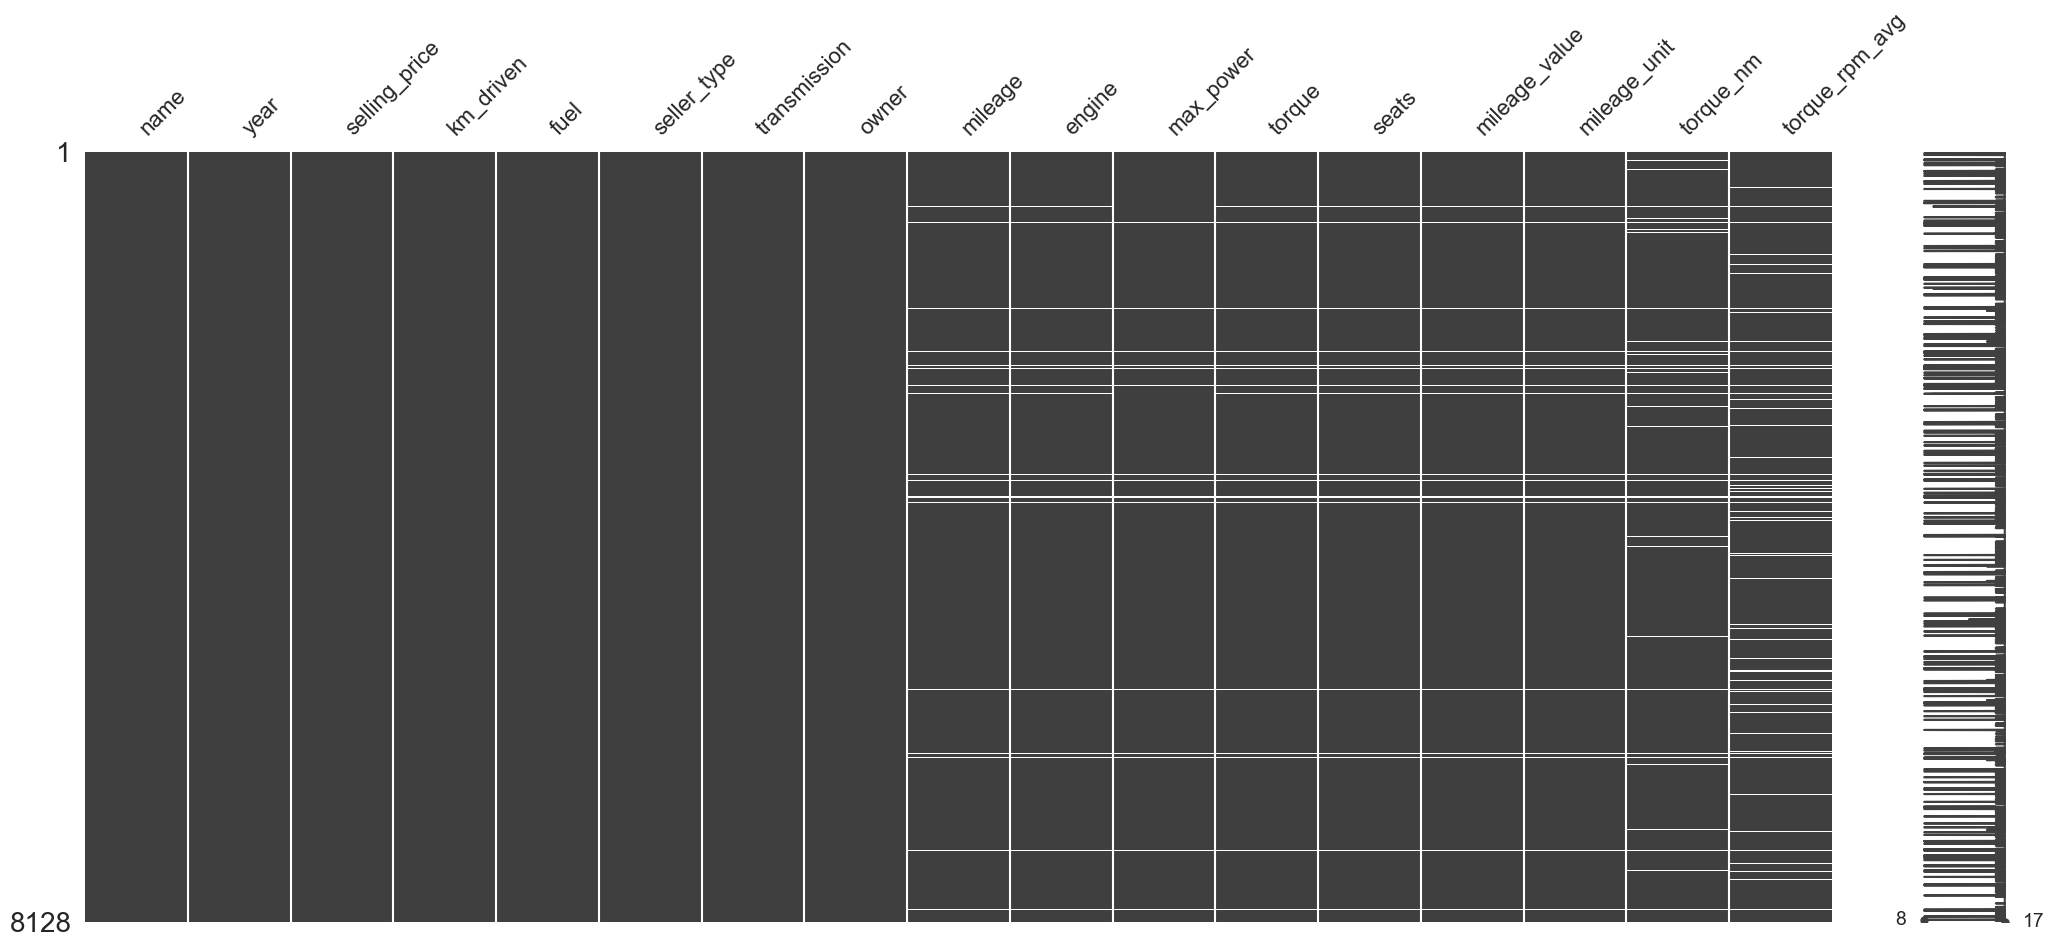

In [16]:
msno.matrix(df)
plt.show()

<b style ="font-size: 20px; color: cyan; ">
🧹 3.2.1 Data Imputation
</b>


In [17]:
#instantiate IteractiveImputer
mice = IterativeImputer(random_state = 0)

In [18]:
#instantiate KNN
knn = KNN(verbose = False)

In [19]:
cat_col_nan = ['fuel', 'seller_type', 'transmission', 'owner', 'mileage_unit']
num_col_nan = ['year', 'selling_price', 'km_driven', 'engine', 'max_power', 'seats', 'mileage_value', 'torque_nm', 'torque_rpm_avg']

In [20]:
df_cat = df[cat_col_nan].copy()
df_num = df[num_col_nan].copy()

In [21]:
# Initialize the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the categorical part
df_cat_encoded = pd.DataFrame(encoder.fit_transform(df_cat), columns=cat_col_nan)

# Combine encoded categorical and numerical columns
df_combined = pd.concat([df_cat_encoded, df_num], axis=1)


In [22]:
df_combined1 = df_combined.copy()
df_combined2 = df_combined.copy()

In [23]:
df_imputed1 = pd.DataFrame(mice.fit_transform(df_combined1), columns = df_combined1.columns)


In [24]:
df_imputed2 = pd.DataFrame(knn.fit_transform(df_combined2), columns = df_combined2.columns)

In [25]:
df_combinedn = df_combined.dropna(how = 'any')

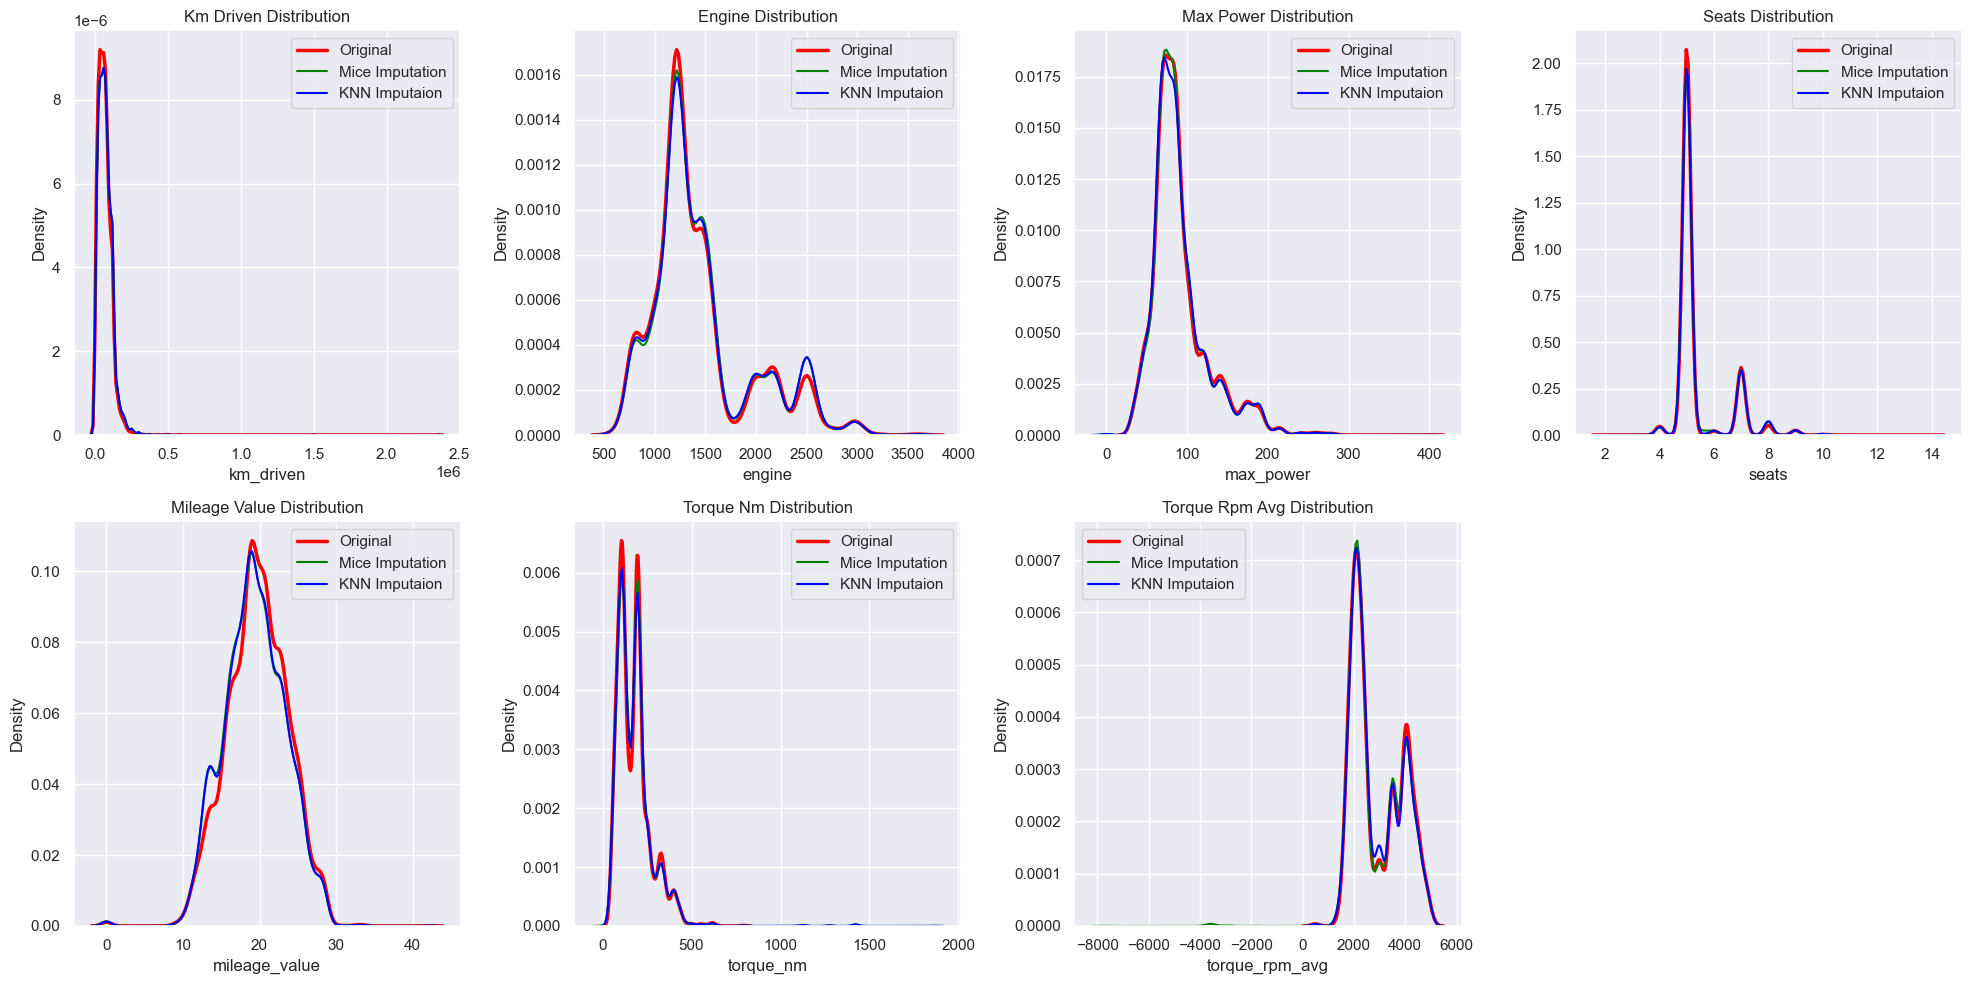

In [26]:
viz = ['km_driven', 'engine', 'max_power', 'seats', 'mileage_value', 'torque_nm', 'torque_rpm_avg']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # wider and shorter for better layout
axes = axes.flatten()  # Flatten 2D axes array to 1D

for i, col in enumerate(viz):
    sns.kdeplot(df_combinedn[col], ax=axes[i], linewidth=2.5, color='red', label='Original')
    sns.kdeplot(df_imputed1[col], ax=axes[i], color='green', label='Mice Imputation')
    sns.kdeplot(df_imputed2[col], ax=axes[i], color='blue', label='KNN Imputaion')
    
    axes[i].set_title(f"{col.replace('_', ' ').title()} Distribution")
    axes[i].legend()

# Remove unused subplot if columns < 8
if len(viz) < len(axes):
    for j in range(len(viz), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [27]:
# Round categorical columns to nearest integer
df_imputed2[cat_col_nan] = df_imputed2[cat_col_nan].round().astype(int)



In [28]:
# Decode categorical columns back to original strings
df_cat_decoded = pd.DataFrame(encoder.inverse_transform(df_imputed2[cat_col_nan]), columns=cat_col_nan)

In [29]:
# Combine decoded categorical with imputed numerical columns
cars = pd.concat([df_cat_decoded, df_imputed2[num_col_nan].round()], axis=1)

In [30]:
cars['name'] = df['name'].values

In [31]:
cars.head()

,fuel,seller_type,transmission,owner,mileage_unit,year,selling_price,km_driven,engine,max_power,seats,mileage_value,torque_nm,torque_rpm_avg,name
0,Diesel,Individual,Manual,First Owner,kmpl,2014.0,450000.0,145500.0,1248.0,74.0,5.0,23.0,190.0,2000.0,Maruti Swift Dzire VDI
1,Diesel,Individual,Manual,Second Owner,kmpl,2014.0,370000.0,120000.0,1498.0,104.0,5.0,21.0,250.0,2000.0,Skoda Rapid 1.5 TDI Ambition
2,Petrol,Individual,Manual,Third Owner,kmpl,2006.0,158000.0,140000.0,1497.0,78.0,5.0,18.0,124.0,2006.0,Honda City 2017-2020 EXi
3,Diesel,Individual,Manual,First Owner,kmpl,2010.0,225000.0,127000.0,1396.0,90.0,5.0,23.0,220.0,2250.0,Hyundai i20 Sportz Diesel
4,Petrol,Individual,Manual,First Owner,kmpl,2007.0,130000.0,120000.0,1298.0,88.0,5.0,16.0,113.0,4278.0,Maruti Swift VXI BSIII


In [32]:
# convert columns to float 
for col in float_col:
    cars[col] = cars[col].astype('float')

In [33]:
#convert columns to category
for col in cat_col:
    cars[col] = cars[col].astype('category')

In [34]:
int = ['year', 'seats']
#convert columns to integers
for col in int:
    cars[col] = cars[col].astype('int')

In [35]:
cars.isna().sum().to_frame()

,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage_unit,0
year,0
selling_price,0
km_driven,0
engine,0
max_power,0


<b style ="font-size: 25px; color: cyan; ">🧩 Handling Missing Values: A Strategic Approach</b><br><br>
During the early stages of data exploration, one of the key challenges I encountered was missing data, a common obstacle in real world datasets, yet a crucial one to address with precision.

To begin, I conducted a thorough audit of missing values across all columns. Leveraging the missingno library, I visualized the gaps and patterns in the dataset. The matrix plot helped reveal a critical insight: the missing values followed a Missing at Random (MAR) pattern. This indicated that the likelihood of missing data in one variable could be predicted based on other variables, making it suitable for advanced imputation techniques.

Rather than relying on simple mean, median, or mode imputation which could introduce bias or distort the data, I opted for more sophisticated approaches:

1. K-Nearest Neighbors (KNN) Imputation and

2. Multivariate Imputation by Chained Equations (MICE)

These methods were applied to both numerical and categorical columns, after appropriate preprocessing, including encoding and merging datasets.

To evaluate their performance, I compared the KDE (Kernel Density Estimation) plots of the original and imputed data. This allowed me to visually assess how well each imputation method preserved the original distribution. The result? KNN imputation outperformed MICE, producing smoother and more naturally aligned distributions across key variables like engine, max_power, and mileage_value.

With this evidence, I confidently proceeded using the KNN-imputed values for the rest of the analysis. This meticulous handling of missing data not only strengthened the integrity of the dataset but also set a solid foundation for accurate insights and predictive modeling in the next phases of the project.

<b style ="font-size: 38px; color: cyan; ">4.0 🔍 Exploratory Data Analysis (EDA)</b>

<b style ="font-size: 25px; color: cyan; ">4.1 Descriptive Statistical Analysis</b>

In [36]:
cars.describe()

,year,selling_price,km_driven,engine,max_power,seats,mileage_value,torque_nm,torque_rpm_avg
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,1454.785802,91.041093,5.412156,19.395423,179.607530,2877.325295
std,4.044249,8.062534e+05,5.655055e+04,501.616285,35.655334,0.953533,3.991826,109.125337,962.289872
min,1983.000000,2.999900e+04,1.000000e+00,624.000000,0.000000,2.000000,0.000000,48.000000,500.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1197.000000,68.000000,5.000000,17.000000,112.000000,2000.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000,19.000000,163.000000,2447.500000
75%,2017.000000,6.750000e+05,9.800000e+04,1582.000000,102.000000,5.000000,22.000000,205.250000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000,42.000000,1862.000000,5000.000000


In [37]:
print(len(cars[cars['mileage_value'] == 0]) + len(cars[cars['max_power'] == 0]))


23


In [38]:
#drop rows with zero min
zero_min = ['mileage_value', 'max_power']
cars = cars[~(cars[zero_min] == 0).any(axis = 1)]

In [39]:
cars.describe()

,year,selling_price,km_driven,engine,max_power,seats,mileage_value,torque_nm,torque_rpm_avg
count,8105.000000,8.105000e+03,8.105000e+03,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000
mean,2013.807773,6.383302e+05,6.983068e+04,1454.661567,91.108698,5.413819,19.434176,179.635287,2877.755706
std,4.045407,8.063767e+05,5.660200e+04,501.152677,35.566560,0.953125,3.895493,109.165139,963.203085
min,1983.000000,2.999900e+04,1.000000e+00,624.000000,33.000000,4.000000,9.000000,48.000000,500.000000
25%,2011.000000,2.549990e+05,3.500000e+04,1197.000000,68.000000,5.000000,17.000000,112.000000,2000.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000,19.000000,166.000000,2436.000000
75%,2017.000000,6.750000e+05,9.800000e+04,1582.000000,102.000000,5.000000,22.000000,207.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000,42.000000,1862.000000,5000.000000


<b style ="font-size: 25px; color: cyan; ">📘 Descriptive Statistical Analysis – The Story Behind the Numbers </b><br><br>
Once the dataset had been cleaned and missing values imputed, the next crucial step was to understand the numerical structure and spread of the data. This led us into the descriptive statistical analysis (DSA) phase where we summarized the central tendencies, spread and potential anomalies within the dataset.

As we reviewed the initial summary statistics, something immediately stood out several numerical columns such as mileage_value and max_power had minimum values of 0. Realistically, a car cannot have 0 kmpl mileage or 0 horsepower, so we flagged these rows as invalid data entries, likely due to improper data recording or these values could be place holders.

To preserve data quality and avoid skewing our analysis and model performance, we filtered out all rows where any of the key mechanical features had a value of zero.

<b style ="font-size: 25px; color: cyan; ">🧼 Post-Cleaning Descriptive Summary</b><br><br>
With those invalid rows removed, the dataset shrank modestly  from 8128 to 8105 rows, a drop of only 23 entries, which is negligible in scale but significant in impact. Running the descriptive analysis again provided much more realistic insights:

selling_price ranged from 29,999 to 1 Crore Rupees, with a median price of 4.50 Lakhs and a noticeable right skew.

engine sizes now started from a plausible 624cc and peaked at 3604cc, reflecting a mix of small cars, SUVs, and high-performance models.

max_power had a reasonable range from 33 hp to 400 hp, indicating better integrity in vehicle specifications.

mileage_value showed a minimum of 9 kmpl/km/kg and a median of 19, aligning well with fuel-efficient vehicles.

seats mainly centered around 5-seaters, but we observed outliers with 7 to 14 seats, likely vans or buses.

torque_nm and torque_rpm also displayed credible mechanical ranges, further supporting the dataset’s post-cleaning integrity.

<b style ="font-size: 25px; color: cyan; ">🎯 Why This Matters</b><br><br>
Performing DSA allowed us to:<br>

1. Identify and correct inconsistencies.

2. Understand the distribution of variables that will impact our modeling.

3. Detect potential outliers.

4. Prepare for targeted EDA and feature engineering, confident in the quality of our foundation.

This phase laid the groundwork for more nuanced exploration such as feature correlation, price trends across car types and ultimately, building a reliable prediction model for used car prices.



<b style ="font-size: 25px; color: cyan; ">4.2 Univariate Analysis(Numerical columns)</b>

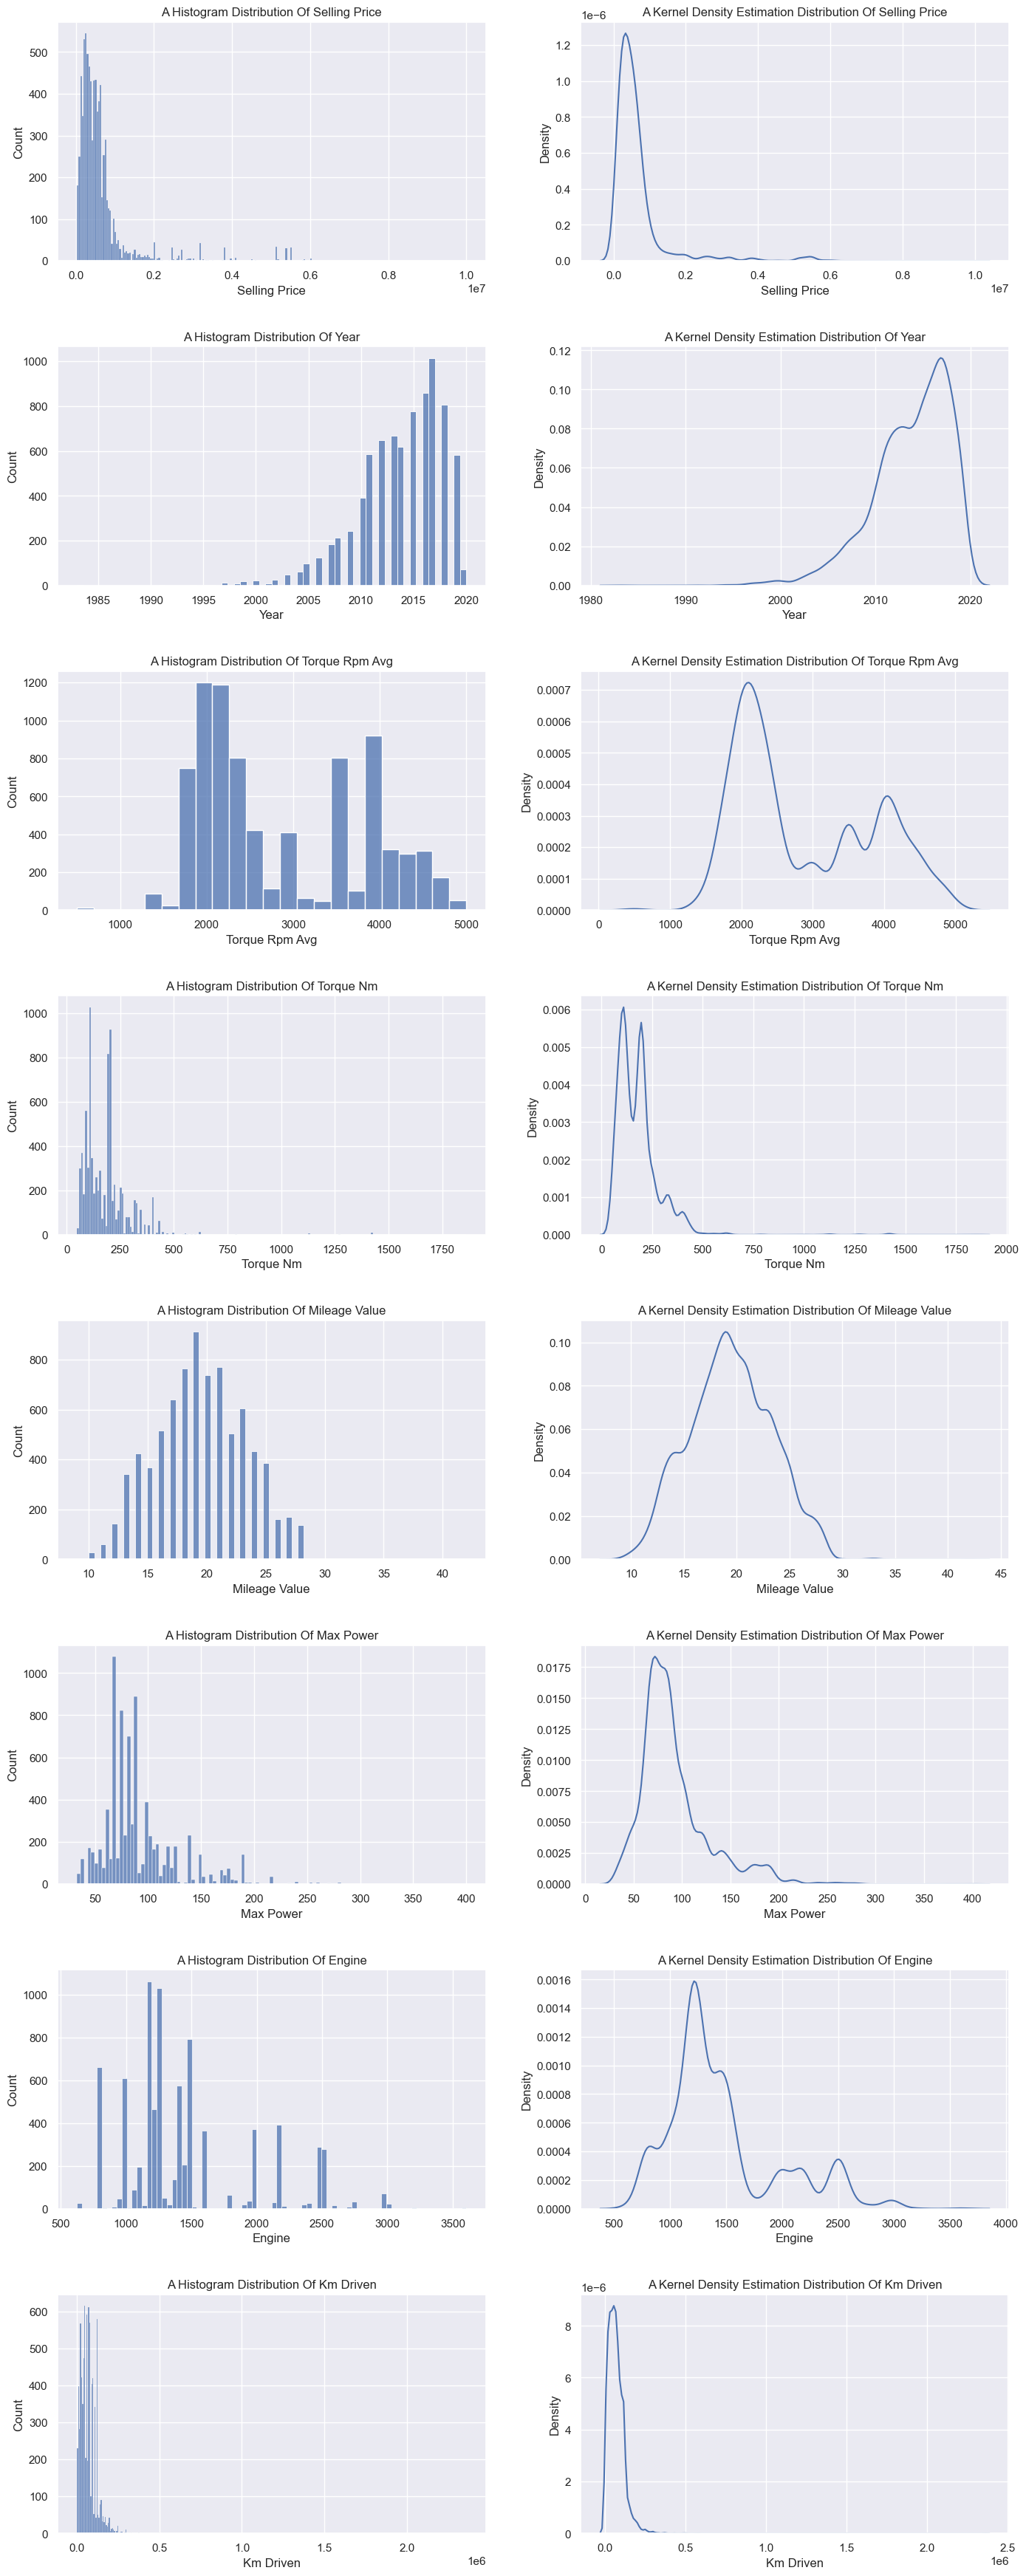

In [40]:
# Columns to visualize
cols = ["selling_price",  "year", "torque_rpm_avg", "torque_nm", "mileage_value", "max_power", "engine", "km_driven"]

# Set up the figure and axes (8 rows, 2 columns)
fig, ax = plt.subplots(len(cols), 2, figsize=(15, 36))
fig.tight_layout(pad=5.0)

# Plot each column
for i, col in enumerate(cols):
    # Histogram
    sns.histplot(x=col, data=cars, ax=ax[i][0], kde=False)
    ax[i][0].set_title(f"A Histogram Distribution Of {col.replace('_', ' ').title()}")
    ax[i][0].set_xlabel(col.replace('_', ' ').title())
    ax[i][0].set_ylabel('Count')

    # KDE Plot
    sns.kdeplot(x=col, data=cars, ax=ax[i][1])
    ax[i][1].set_title(f"A Kernel Density Estimation Distribution Of {col.replace('_', ' ').title()}")
    ax[i][1].set_xlabel(col.replace('_', ' ').title())
    ax[i][1].set_ylabel('Density')

plt.show()


<b style ="font-size: 25px; color: cyan; ">4.2.1 📈 Selling Price Distribution</b><br>
The distribution of selling prices, as visualized through both the KDE and histogram plots, reveals a right-skewed (positively skewed) pattern.

This indicates that while most used cars are priced within a relatively affordable range, there are a few high-priced outliers that stretch the distribution’s tail to the right. These high-priced entries could correspond to luxury or high-performance vehicles, which are less common in the dataset.

The peak of the distribution (mode) lies between ₦200,000 and ₦500,000, suggesting that most used cars are priced within this bracket. The skewness also implies that the mean selling price will be higher than the median, a typical characteristic of right-skewed data.

This insight is important as it suggests that applying certain models (e.g., linear regression) without addressing the skewness might lead to biased predictions. Log transformation or robust modeling techniques might be considered in the preprocessing or modeling stage to address this.

<b style ="font-size: 25px; color: cyan; ">4.2.2 📈 Year of Manufacture</b><br>
The distribution of the year variable, representing the manufacturing year of the cars, exhibits a left-skewed (negatively skewed) pattern. This skewness indicates that most of the cars in the dataset were manufactured between 2010 and 2020, with relatively fewer older vehicles dating back to the 1980s and early 2000s.

The histogram clearly shows a concentration of values toward the right (recent years), while the KDE plot reinforces this observation with a smooth peak around 2015–2018, gradually tapering off toward the earlier years. This skewed distribution is typical for used car listings, as newer cars are more likely to be resold or listed online, while older cars may no longer be in circulation or considered valuable for resale.

This insight is essential for downstream analysis, particularly in predictive modeling, where the year could be a strong determinant of the car’s selling price and condition.



<b style ="font-size: 25px; color: cyan; ">4.2.3 📈 Torque RPM Average</b><br>
The distribution of the torque_rpm_avg variable which represents the engine speed (in revolutions per minute) at which maximum torque is delivered exhibits a distinct multi-modal pattern with some right-skewness.

This multi-modal distribution points to the existence of at least 4 distinct vehicle categories based on their engine performance characteristics. The first peak is concentrated around 1800 - 2500 RPM values, which may represent standard city cars or diesel-powered engines, known for delivering peak torque at average revolutions, thus enhancing fuel efficiency and low-speed driveability.

The second and third peak emerges at 3000 and 3500 RPMs respectively, suggesting the presence of performance-focused or petrol-powered cars, which typically achieve maximum torque at elevated engine speeds. This segment of vehicles is likely designed for strong acceleration, highway performance, or spirited driving dynamics.

Moreover, the fourth peak in the distribution reveals that while most vehicles cluster around typical torque RPM values (likely between 4,000 to 5,000 RPM), a long tail of high-RPM entries exists possibly due to sports cars, high-performance engines, or recording anomalies.

Understanding this nuanced distribution is critical not just from a mechanical perspective, but also for targeted marketing and pricing strategies:

For example, vehicles in the first cluster may appeal more to city commuters and economy-focused buyers, while

Vehicles in the third and fourth peak cater to enthusiasts or those seeking highway comfort and responsiveness.

From a data science standpoint, recognizing such multimodality informs us that treating this variable as normally distributed would be misleading. It also opens the door for segmentation analysis, feature engineering, and targeted modeling for instance, seeing how torque_rpm clusters relate to selling price or engine type.

<b style ="font-size: 25px; color: cyan; ">4.2.4 📈 Mileage Value</b><br>
The distribution of the mileage_value variable, which represents the fuel efficiency of the cars (typically measured in km per litre or km per kg, depending on fuel type), reveals a roughly bell-shaped pattern that is approximately normal, with a slight left-skew.

This distribution is centered around 20 km/unit, suggesting that most used cars in the dataset deliver moderate and consistent fuel efficiency. This central tendency aligns with expectations for a mix of compact and mid-sized vehicles, which are common in the Nigerian used car market.

The slight left skewness indicates that a small number of vehicles offer exceptionally high mileage, possibly hybrid or highly fuel-efficient petrol cars. However, these are relatively rare, and their presence subtly pulls the distribution's tail leftward. On the other hand, very few vehicles fall on the lower end of fuel efficiency, which might include larger SUVs or older vehicles with outdated engine technology.

This insight into fuel efficiency is especially critical for budget-conscious buyers, for whom mileage is often a top priority. The consistency around the 20 km/unit mark offers reassurance to buyers seeking economical options, and it helps sellers highlight value in cars that exceed this benchmark.

From a modeling perspective, this roughly normal distribution makes mileage_value a well-behaved numerical feature, suitable for linear modeling and correlation-based analysis, while still leaving room for exploration of segments with superior or inferior fuel economy.



<b style ="font-size: 25px; color: cyan; ">4.2.5 📈 Max Power (bhp/PS)</b><br>

The distribution of the max_power variable, representing the maximum power output of the car's engine (likely in brake horsepower or PS), exhibits a heavily right-skewed pattern with a prominent peak at the lower end of the power spectrum. This indicates that the vast majority of used cars in the dataset are equipped with engines that deliver modest power.

The histogram clearly shows a dense concentration of vehicles with max_power values between approximately 50 and 150 units, with the highest counts peaking sharply around the 75-100 unit range. As power increases beyond this range, the frequency of vehicles drops off dramatically, forming a long tail that extends towards higher power outputs, with very few cars exceeding 250 units. The Kernel Density Estimation (KDE) plot smoothly reinforces this observation, displaying a steep initial rise to a significant unimodal peak around 80-90 units, followed by a rapid decline and a very long, flat tail.

This highly skewed distribution is a key insight into the performance capabilities of the available used car inventory. It confirms that the mass market for used cars is dominated by vehicles with standard, practical power outputs, rather than high-performance models. This information is crucial for strategic pricing and marketing: while high-power vehicles represent a niche segment that might command premium prices, the primary focus for sales and inventory management should be on the more common lower-to-moderate power cars. Understanding this distribution helps us align our offerings with prevailing market demand and accurately assess the value proposition of vehicles across the power spectrum.

The distribution of the engine variable, representing the engine displacement in cubic centimeters (CC), displays a complex, multimodal pattern with significant concentrations at specific engine sizes and an overall right-skewness. This indicates a diverse range of engine capacities within the used car market, reflecting various vehicle segments and consumer needs.

The histogram clearly shows multiple distinct peaks, with the most prominent being around 1000 CC and 1200 CC, and another substantial cluster around 1500 CC. This suggests that compact and mid-range engine sizes are the most common in the dataset. Further, there are discernible, albeit smaller, peaks around 2000 CC and 2500 CC, representing larger engine vehicles. The Kernel Density Estimation (KDE) plot smoothly confirms these observations, illustrating a primary high peak around 1000-1200 CC, followed by several other noticeable bumps at higher CC values, with the density gradually tapering off towards larger engine sizes.

This intricate, multimodal distribution of engine size is highly informative for market segmentation and pricing strategies. It confirms the prevalence of fuel-efficient, smaller-engine vehicles, while also identifying distinct segments for more powerful or larger-capacity engines. Understanding these common engine size preferences is crucial for targeted inventory acquisition, forecasting demand for specific vehicle types, and accurately assessing the value proposition of cars based on their engine performance. For instance, cars at peak engine sizes might represent high-volume sellers, while those at the tail ends could be niche products with different pricing dynamics.

<b style ="font-size: 25px; color: cyan; ">4.2.6 📈 Engine Displacement (CC)</b><br>

The distribution of the engine variable, representing the engine displacement in cubic centimeters (CC), reveals a complex, multimodal pattern with an overall right-skewness. This suggests a diverse range of engine sizes in the used car market, aligning with the presence of multiple vehicle classes tailored to different consumer needs and performance expectations.

The histogram highlights several distinct peaks:

A prominent concentration around 1000 CC and 1200 CC, representing compact cars and fuel-efficient vehicles.

A secondary cluster near 1500 CC, indicating a popular mid-range segment.

Smaller but noticeable peaks around 2000 CC and 2500 CC, likely representing SUVs and high-performance vehicles.

These patterns are confirmed by the Kernel Density Estimation (KDE) plot, which smooths the frequency distributions and shows:

A high primary peak between 1000–1200 CC

Followed by moderate bumps at regular intervals, tapering off as engine sizes increase.

<b style ="font-size: 25px; color: cyan; ">🔍 Interpretation & Business Insight:</b><br>
This multimodal distribution carries valuable implications:

Vehicles with engine sizes around 1000–1500 CC dominate the market — likely offering better mileage and lower tax brackets, and appealing to budget-conscious urban drivers.

The tail of the distribution reflects higher-displacement engines, suited for power users or premium car segments, albeit less common.

<b style ="font-size: 25px; color: cyan; ">📈 Strategic Relevance:</b><br>
Inventory planning can prioritize cars in high-frequency engine segments to match demand.

Pricing models can integrate engine size as a tiered variable, recognizing its role in consumer perception of performance and value.

Marketing efforts can better segment offers: smaller engines for economy-focused buyers, larger engines for performance or luxury niches.

<b style ="font-size: 25px; color: cyan; ">4.2.7 📈 Kilometers Driven (km_driven)</b><br>
The distribution of the km_driven variable representing the total distance traveled by each car displays a strong right-skewed pattern with a sharp peak near the lower end of the scale, as seen in both the histogram and KDE plots.

🔍 Key Observations:
The majority of used cars have driven less than 100,000 to 150,000 km, indicated by the dense spike in that region.

The distribution quickly tapers off, with fewer vehicles having higher mileage.

A long tail stretches toward 2.5 million km, showing the presence of some extreme outliers—vehicles with unusually high mileage, which may represent commercial or heavily used cars (e.g., taxis, transport vans).

📈 Business and Analytical Insights:
The peak near the beginning suggests that most vehicles on the market are relatively low-mileage, which is typically preferred by buyers due to reduced wear and tear.

This variable is critical for pricing models, as mileage and Kilometers driven strongly influences a car’s residual value and buyer perception of condition.

<b style ="font-size: 25px; color: cyan; ">4.3 Univariate Analysis (Categorical Columns)</b>

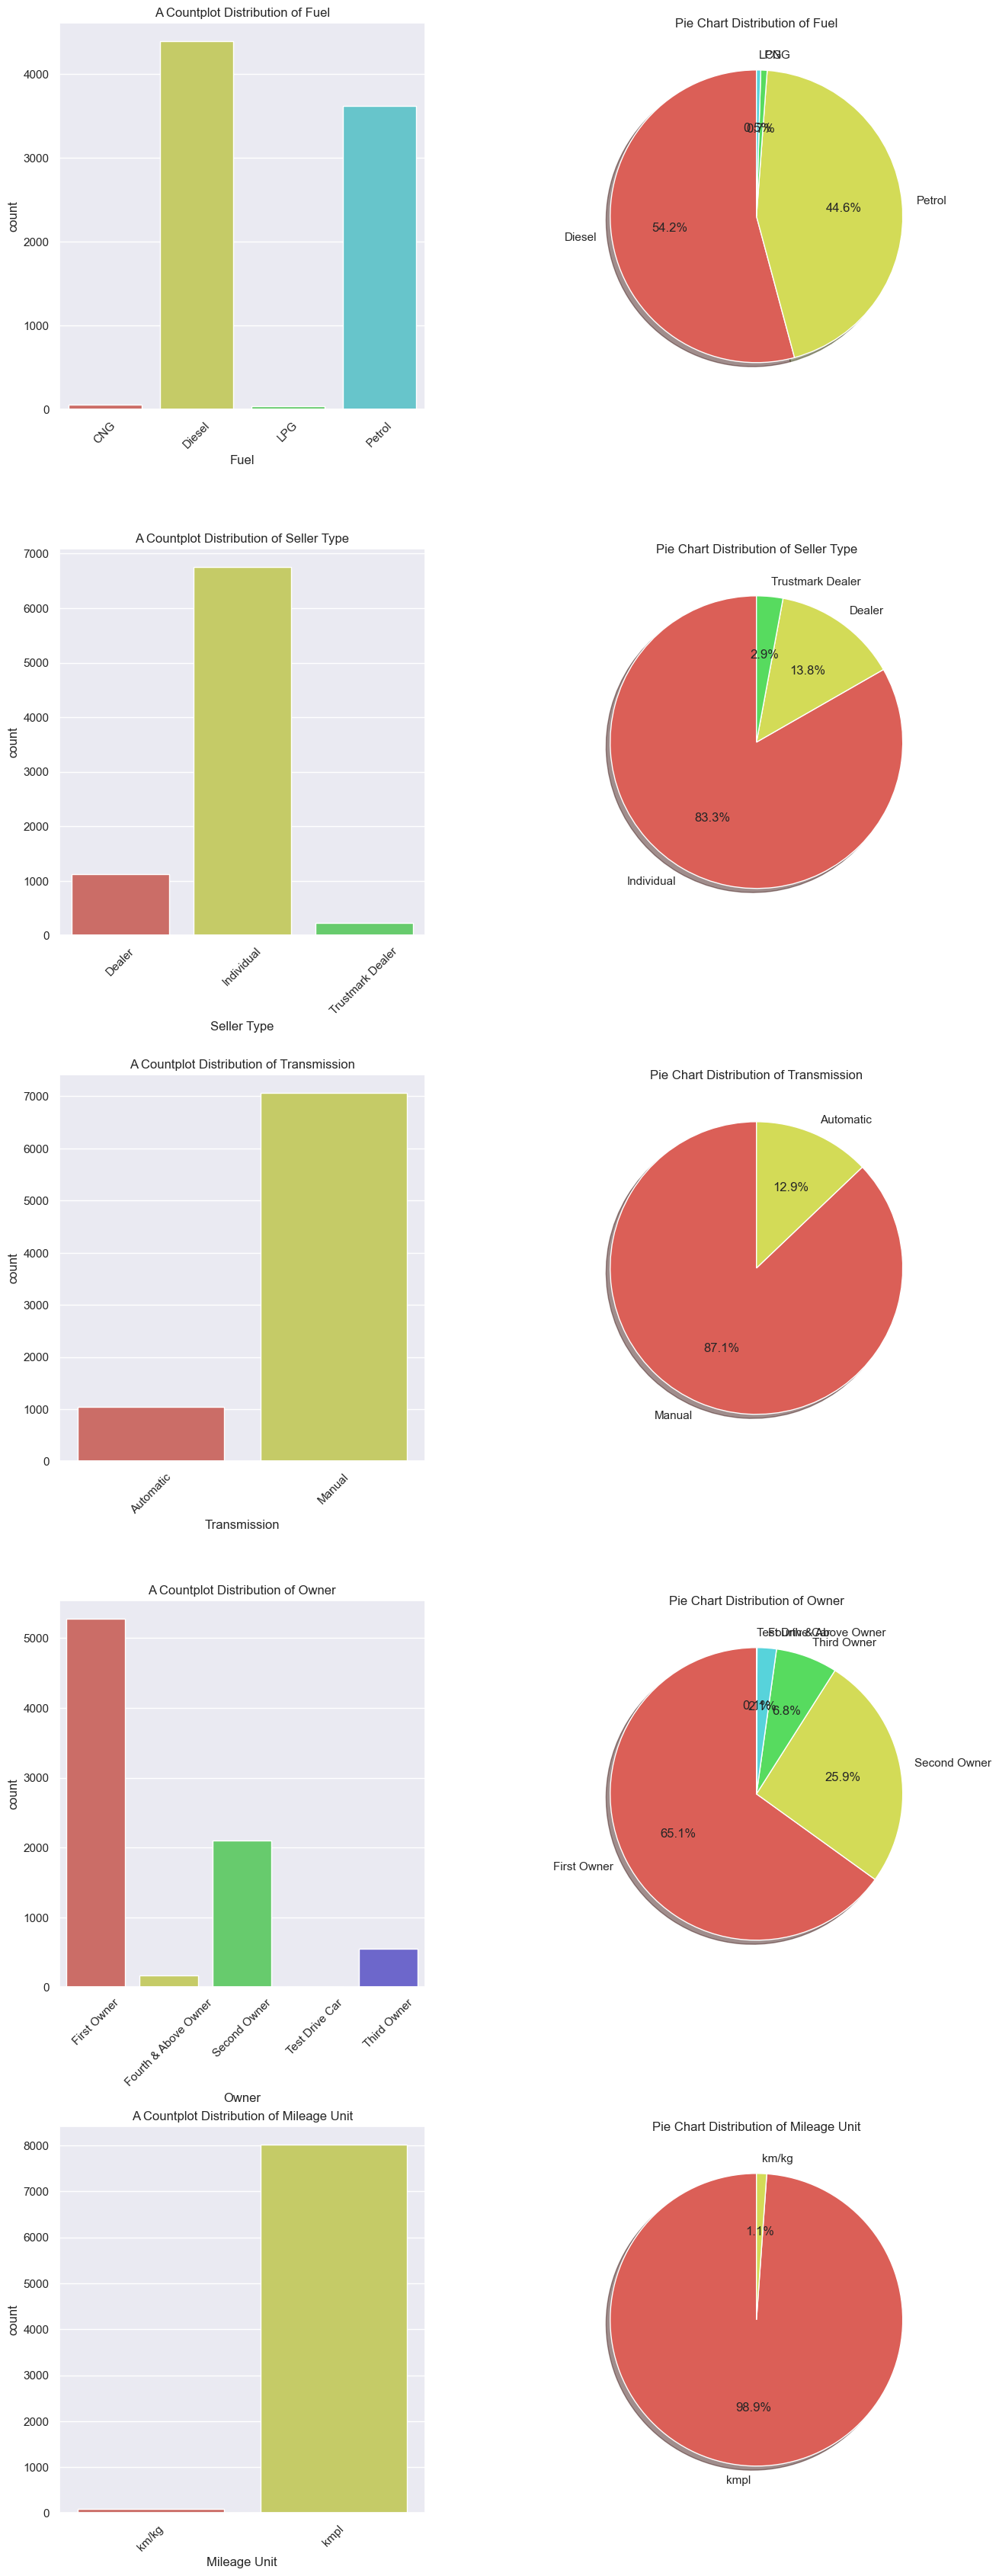

In [41]:
# Columns to visualize
cat_col = ['fuel', 'seller_type', 'transmission', 'owner', 'mileage_unit']

# Set up the figure and axes (count of cat_col, 2 columns)
fig, ax = plt.subplots(len(cat_col), 2, figsize = (15, 36))
fig.tight_layout(pad = 9.0)
colors = sns.color_palette('hls') 

for i, col in enumerate(cat_col):
    #countplot
    sns.countplot(x = col, data = cars, ax = ax[i][0], palette=colors)
    ax[i][0].set_title(f"A Countplot Distribution of {col.replace('_', ' ').title()}")
    ax[i][0].set_xlabel(col.replace('_', ' ').title())
    ax[i][0].tick_params(axis='x', rotation=45)

    cars[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, ax = ax[i][1], colors=colors)
    ax[i][1].set_title(f"Pie Chart Distribution of {col.replace('_', ' ').title()}")
    ax[i][1].set_ylabel("")
    ax[i][1].tick_params(axis='x', rotation=90)
#show plot
plt.show()



<b style ="font-size: 20px; color: cyan; "> Fuel Type</b><br>
The bar chart for the fuel column shows that Petrol and Diesel dominate the market, with Petrol slightly leading. CNG and LPG are barely present.<br><br>
➡️ Insight: This suggests that most used cars in the dataset rely on traditional fuel sources, particularly Petrol, likely due to wider availability and lower cost of ownership in urban areas. Electric and hybrid options, if present at all, are negligible—pointing to limited market adoption.

<b style ="font-size: 20px; color: cyan; "> Seller Type</b><br>
The chart for seller_type reveals that Individual sellers make up the vast majority of listings, with Dealers being a distant second and Trustmark Dealers barely noticeable.<br><br>
➡️ Insight: This indicates a peer-to-peer dominated market. Most cars are being sold directly by their owners, possibly reflecting personal use vehicles rather than commercial fleet sales. The low number of Trustmark dealers could mean fewer verified or certified resale outlets in the market.

<b style ="font-size: 20px; color: cyan; "> Transmission</b><br>
Here, Manual transmission vehicles are far more prevalent than Automatic ones.<br><br>
➡️ Insight: This distribution reflects market preferences or affordability factors. Manual cars are often more fuel-efficient and cheaper to maintain, which may appeal to the budget-conscious segment or align with regional driving culture.

<b style ="font-size: 20px; color: cyan; "> Owner Type</b><br>
The owner variable shows that First-owner vehicles dominate, followed by a much smaller share of Second-owner and Third-owner cars. Rare categories like Fourth & Above Owner and Test Drive Cars are minimal.<br><br>
➡️ Insight: Buyers likely prefer cars with fewer previous owners due to perceptions of better maintenance and longer lifespan. This also suggests that many of the vehicles are relatively new or well-maintained.

<b style ="font-size: 20px; color: cyan; "> Mileage Unit</b><br>
This column contains only two categories—likely kmpl (Kilometers per liter) and km/kg—with kmpl dominating the dataset.<br><br>
➡️ Insight: Most cars use liquid fuels (Petrol/Diesel) rather than alternative fuels like CNG or LPG, reinforcing the insight from the fuel distribution. This also standardizes the mileage comparison for most vehicles in the dataset.

<b style ="font-size: 25px; color: cyan; ">4.4 Bi-variate Analysis (Numerical vs Numerical)</b>

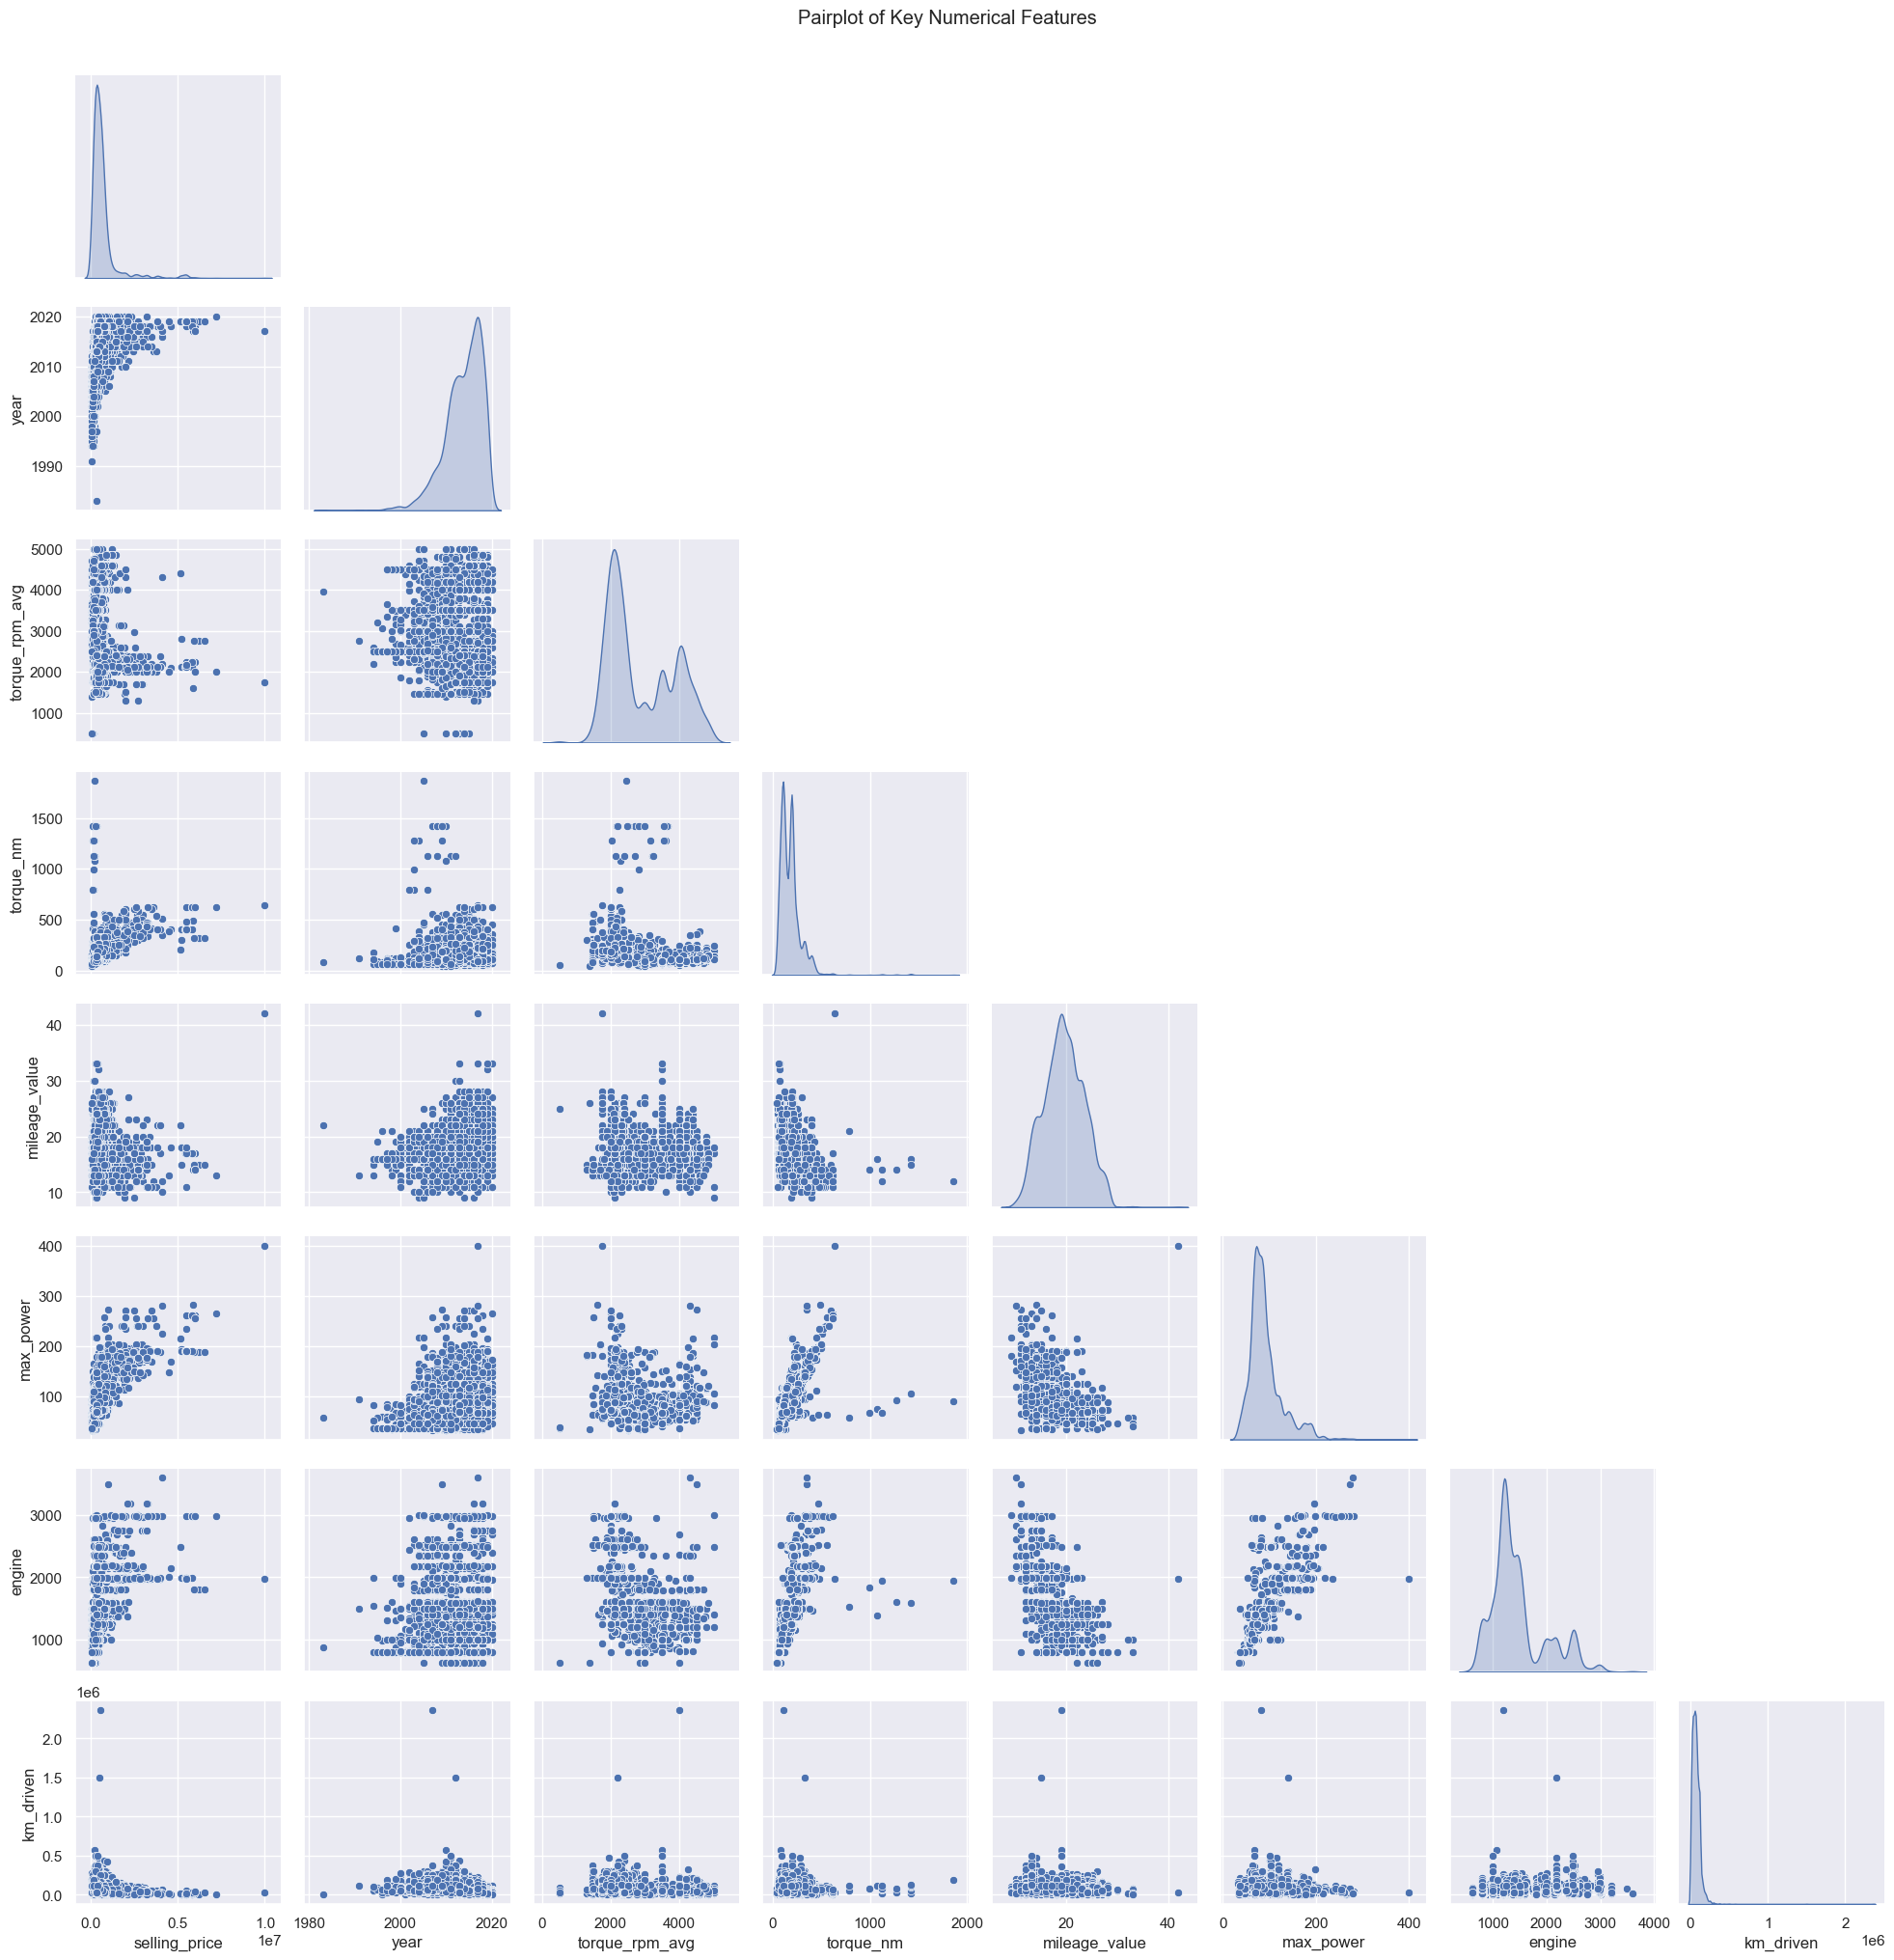

In [42]:
# Create the pairplot
sns.pairplot(cars[cols], diag_kind='kde', corner=True, palette = 'hls')
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

<b style ="font-size: 25px; color: cyan; ">📖 Pairplot Storytelling: Exploring the Dynamics of Used Car Attributes</b><br>
To uncover the hidden relationships among the core numerical features of the used car dataset, a Seaborn pairplot was constructed. This visualization provides a comprehensive lens through which interdependencies, trends and data distributions can be observed across key variables such as selling price, engine capacity, mileage, power, torque and more.

<b style ="font-size: 25px;">🚗 Selling Price – What Drives It?</b><br>

- <b style = "color: cyan;">Strongest Predictors:</b> The plots in the first row (or column) clearly indicate that selling_price has the most evident relationships with year, max_power, and engine.<br><br>
  - **selling_price vs. year:** A strong positive linear relationship is apparent. As the year of manufacture increases (i.e., newer cars), the selling_price tends to be significantly higher. This is a fundamental and expected driver of used car value.<br><br>
  - **selling_price vs. max_power and engine:** There's a clear positive correlation. Cars with higher max_power and larger engine sizes generally command higher selling_prices. This suggests that performance and capability are significant value contributors.<br><br>

- <b style = "color: cyan;">Inverse Relationship:</b><br><br>
  - **selling_price vs. km_driven:** As expected, a strong negative linear relationship is observed. Cars with higher km_driven typically have a lower selling_price, indicating depreciation due to usage.<br><br>
- <b style = "color: cyan;">Complex/Less Direct Relationships:</b><br><br>
  - **selling_price vs. mileage_value:** This relationship appears more scattered and less directly linear. While very high and very low mileage_value cars might sit at the ends, there isn't a clear monotonic trend. This could imply that fuel efficiency is a factor, but its influence might be overshadowed by other features like brand, segment, and overall price point.<br><br>
  - **selling_price vs. torque_nm and torque_rpm_avg:** While some positive correlation exists (higher torque often means higher price), the scatter is wider, especially for torque_rpm. The multimodal nature of torque_rpm specifically means its relationship with selling_price is not a simple linear one and may require interaction terms or more complex modeling.<br><br>

- <b style = "color: cyan;">Inter-Feature Relationships (Beyond Price):</b><br><br>
  - **engine, max_power, torque_nm:** These three features are highly interdependent and show strong positive correlations with each other. Larger engine sizes generally produce more max_power and higher torque_nm. This multicollinearity is expected and will need to be managed during model building (e.g., through feature selection or regularization), as they convey similar information.<br><br>
  - **year vs. km_driven:** A negative correlation is visible: older cars tend to have accumulated more km_driven, reinforcing the age-usage pattern.<br><br>
  - **torque_rpm_avg vs. torque_nm and max_power:** While related, the relationship is not as clean as between engine/power/torque_nm. The bimodal distribution of torque_rpm is reflected here, indicating different engine tuning philosophies that achieve peak torque at different RPMs.<br><br>

- <b style = "color: cyan;">Business Intelligence Insights:</b><br><br>

  - **Key Value Drivers Identified:** The pairplot visually confirms that year, km_driven, max_power, and engine are the most influential numerical factors in determining a used car's selling_price. This knowledge is paramount for valuation models, inventory acquisition, and setting competitive prices.
Depreciation Dynamics: The clear inverse relationship with km_driven and direct relationship with year underscore the importance of age and usage in value assessment.
  - **Performance Premium:** The positive correlation of selling_price with max_power and engine size suggests a premium for more capable vehicles, allowing us to segment the market by performance tier.
Complexities in Torque & Mileage: The less straightforward relationships with mileage_value, torque_nm, and torque_rpm_avg indicate that these features might require more nuanced treatment in a predictive model, perhaps through non-linear transformations, interaction terms, or by extracting specific categorical insights (e.g., "high-mileage efficiency" vs. "performance car efficiency").
  - **Data Redundancy:** The strong inter-correlations among engine, max_power, and torque_nm imply some redundancy. During feature selection, I might consider keeping the most predictive or interpretable one, or use techniques that handle correlated features.  




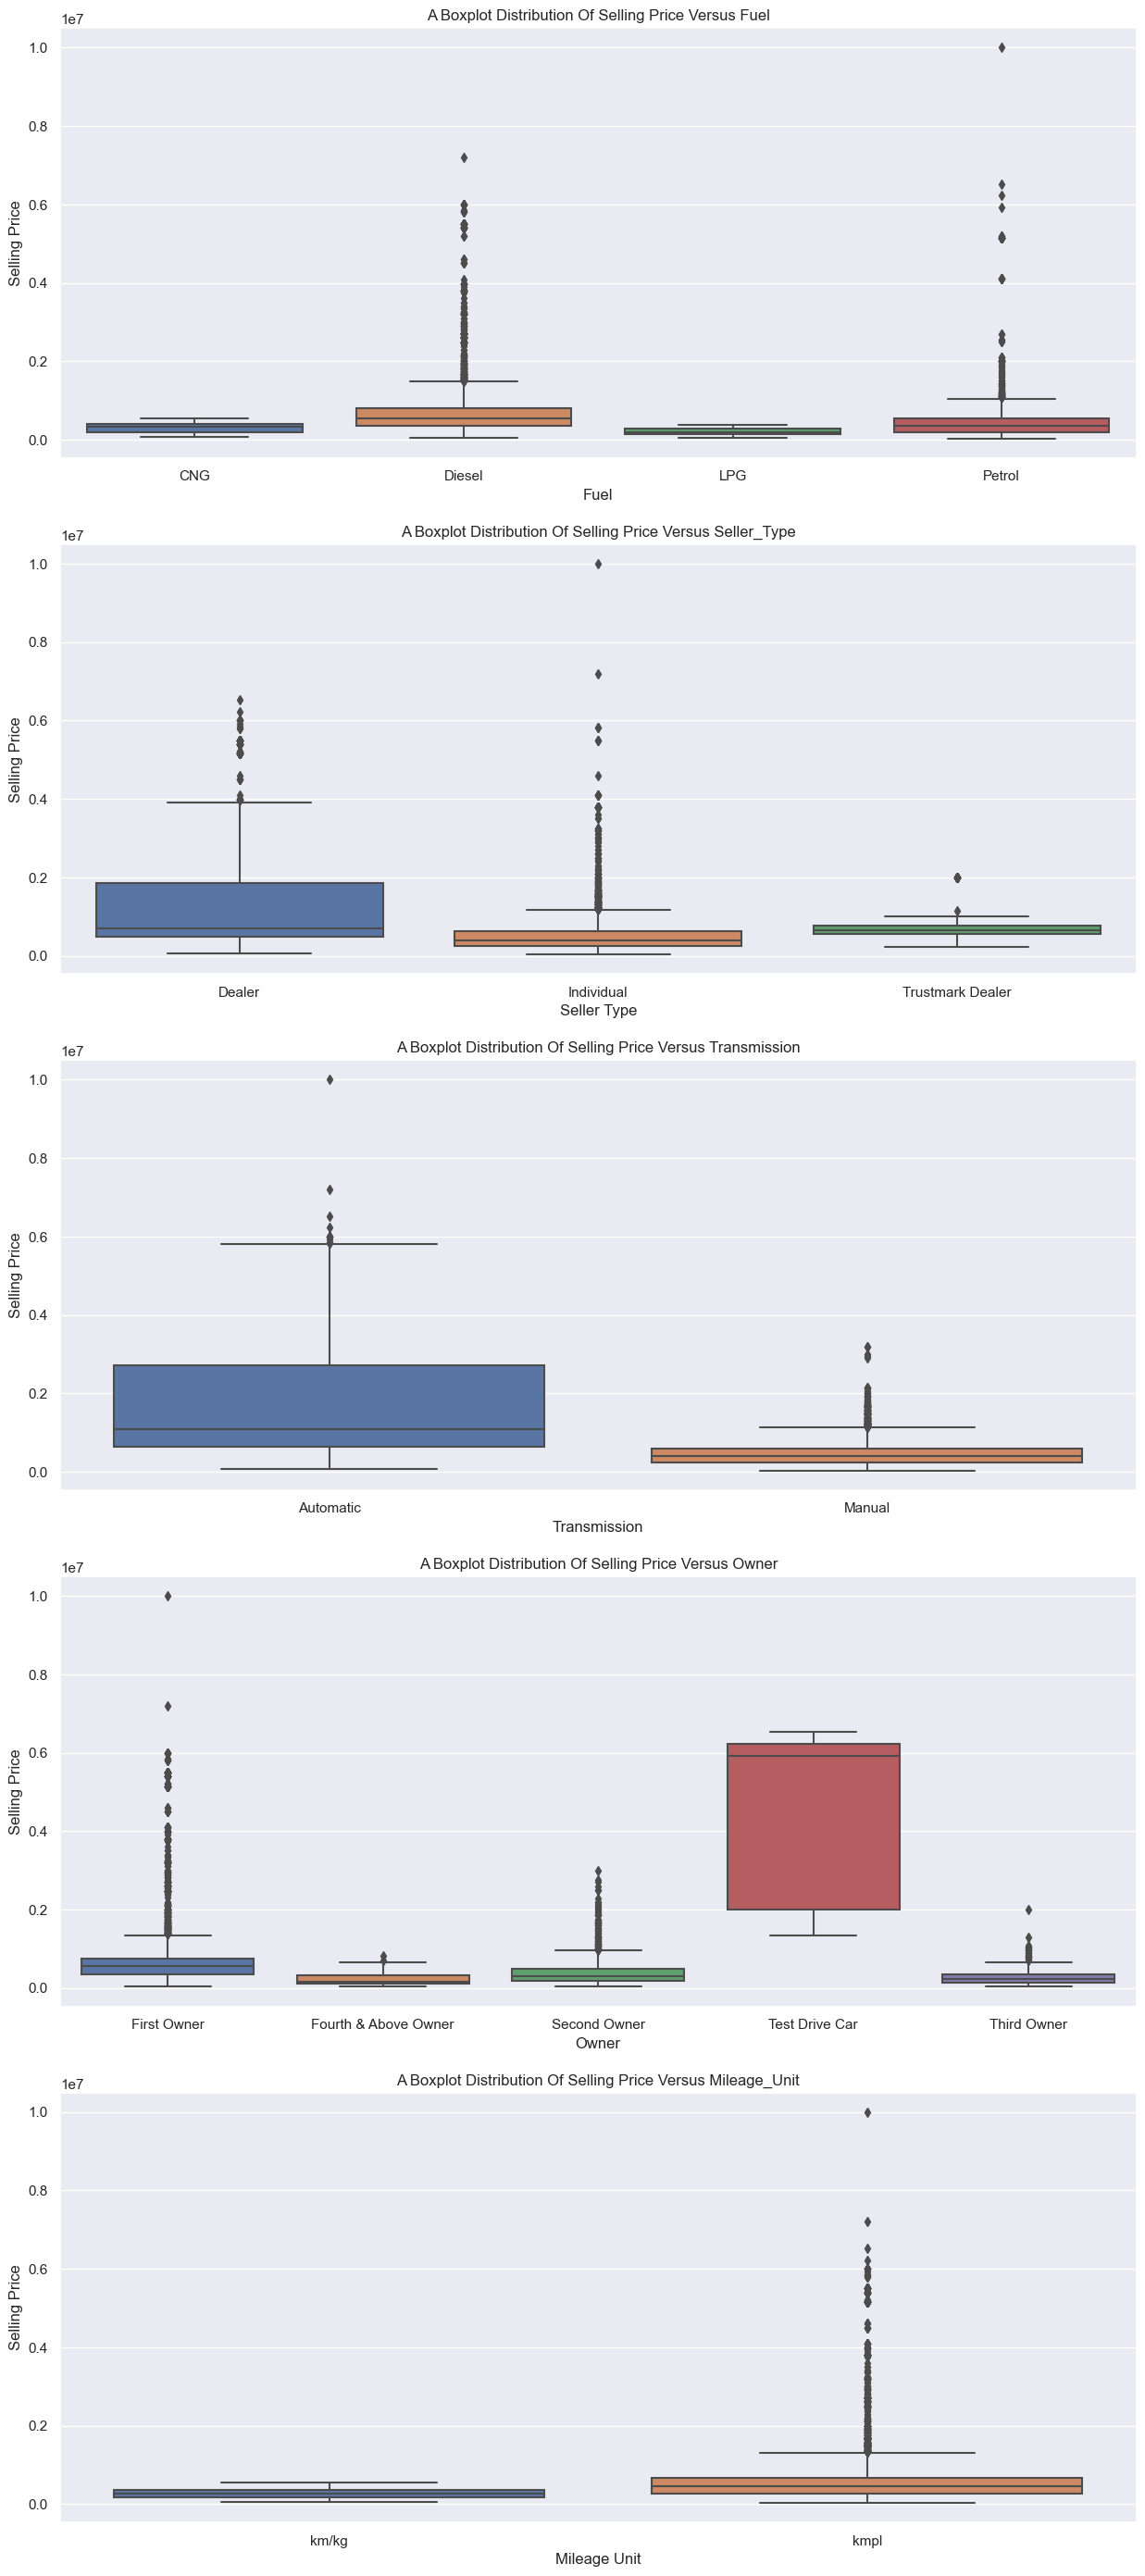

In [43]:
fig, ax = plt.subplots(len(cat_col), 1, figsize = [15, 35])

for i, col in enumerate(cat_col):
    sns.boxplot(x = col, y = 'selling_price', data = cars, ax = ax[i])
    ax[i].set_title(f"A Boxplot Distribution Of Selling Price Versus {col.title()}")
    ax[i].set_xlabel(col.replace("_", " ").title())
    ax[i].set_ylabel("Selling Price")
plt.show()


<b style ="font-size: 20px; color: cyan; ">Selling Price vs. Fuel Type</b><br><br>
My analysis of selling_price by fuel type unequivocally demonstrates a premium commanded by Diesel vehicles in the used car market. These cars not only achieve a higher median selling price but also exhibit greater price dispersion, suggesting a segment with diverse offerings, including more premium or performance-oriented models. While Petrol cars form a substantial volume, their median price is noticeably lower. CNG and LPG vehicles occupy the lowest price tiers, reflecting their primary appeal as budget-friendly options. This insight is critical for inventory management and marketing; prioritizing Diesel vehicle acquisition and sales can drive higher revenue, while understanding the specific value propositions of other fuel types is essential for targeted campaigns.

<b style ="font-size: 20px; color: cyan; ">Selling Price vs. Seller Type</b><br><br>
The seller_type analysis indicates a clear distinction in selling_price behavior across different seller categories. Vehicles listed by 'Dealers' or 'Trustmark Dealers' consistently achieve higher median selling prices, often reflecting value additions such as pre-sale inspections, warranties, or certified used car programs. In contrast, cars from 'Individual' sellers generally show a lower median price, consistent with direct consumer-to-consumer transactions where prices may be more negotiable or reflective of private sales without additional guarantees. This insight underscores the value proposition that professional sellers bring to the market, allowing us to benchmark our pricing strategies against different seller types and identify opportunities for either competitive pricing or value-added service differentiation.<br><br>

<b style ="font-size: 20px; color: cyan; ">Selling Price vs. Transmission Type</b><br><br>
The transmission type significantly influences selling_price, with Automatic vehicles consistently achieving a higher median price than their Manual counterparts. This trend reflects the increasing consumer preference for convenience and ease of driving, which translates into a premium in the used car market. While Manual transmission cars still represent a substantial volume, their price distribution is generally lower. This finding is crucial for inventory planning and sales forecasting, advising us to strategically acquire more automatic vehicles to capture higher-value sales, and to highlight the 'automatic' feature prominently in marketing to attract premium buyers.<br><br>

<b style ="font-size: 20px; color: cyan; ">Selling Price vs. Owner Count</b><br><br>
The owner count is a critical determinant of selling_price, demonstrating a clear inverse relationship: the more owners a car has had, the lower its resale value. 'First Owner' vehicles command the highest median prices, signifying a strong market preference due to perceived better care and lower wear. Each subsequent owner significantly diminishes the vehicle's market value, with 'Fourth & Above Owner' cars realizing the lowest prices. This insight is fundamental for our acquisition strategy and valuation models; prioritizing 'First Owner' vehicles will yield higher profit margins, while cars with multiple previous owners must be priced competitively, often requiring more aggressive discounts to facilitate sales.<br><br>

<b style ="font-size: 20px; color: cyan; ">Selling Price vs. Mileage Unit</b><br><br>
The mileage_unit variable, which differentiates between fuel efficiency reported in 'kmpl' (kilometers per liter, typical for Petrol/Diesel) and 'kg/km' (kilograms per kilometer, typical for CNG/LPG), reveals a strong correlation with selling_price that largely mirrors the fuel type relationship. Vehicles measured in 'kmpl' (predominantly Petrol and Diesel) generally command significantly higher median selling prices compared to those in 'kg/km' (primarily CNG/LPG). This further solidifies the finding that fuel type, and implicitly the associated efficiency measurement, plays a direct role in vehicle valuation. This insight reinforces our need to differentiate inventory and marketing based on fuel system and its inherent economic or performance implications, aligning with distinct buyer segments.

<b style ="font-size: 28px; color: cyan; ">4.5 Correlation Matrix Analysis: Unveiling Relationships in Used Car Data</b>

In [44]:
#compute the correlation matrix
corr_matrix = cars.corr(numeric_only=True).round(2)
corr_matrix

,year,selling_price,km_driven,engine,max_power,seats,mileage_value,torque_nm,torque_rpm_avg
year,1.00,0.41,-0.42,0.04,0.24,0.01,0.33,0.11,0.04
selling_price,0.41,1.00,-0.23,0.46,0.75,0.04,-0.12,0.50,-0.13
km_driven,-0.42,-0.23,1.00,0.20,-0.04,0.23,-0.18,0.08,-0.25
engine,0.04,0.46,0.20,1.00,0.70,0.62,-0.58,0.62,-0.37
max_power,0.24,0.75,-0.04,0.70,1.00,0.20,-0.38,0.69,-0.15
seats,0.01,0.04,0.23,0.62,0.20,1.00,-0.47,0.30,-0.31
mileage_value,0.33,-0.12,-0.18,-0.58,-0.38,-0.47,1.00,-0.26,-0.08
torque_nm,0.11,0.50,0.08,0.62,0.69,0.30,-0.26,1.00,-0.47
torque_rpm_avg,0.04,-0.13,-0.25,-0.37,-0.15,-0.31,-0.08,-0.47,1.00


This correlation matrix quantifies the linear relationships between the numerical features in the used cars dataset, offering critical insights into the factors influencing Selling price and the inherent structure of vehicle characteristics. Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear relationship.<br><br>

<b style ="font-size: 25px; color: cyan; ">4.5.1 The Drivers of Selling Price (selling_price column):</b><br><br>

- <b>Strong Positive Predictors:</b>

  - **max_power (0.75):** This is the strongest positive correlate with selling_price. It indicates that cars with higher maximum power outputs command significantly higher prices. This underscores the market's willingness to pay a premium for performance.<br><br>
  - **engine (0.46):** Engine displacement also shows a strong positive correlation, though less intense than max_power. Larger engines generally translate to higher prices, aligning with the power observation.<br><br>
  - **torque_nm (0.50)** torque_nm show strong positive correlations with selling_price. This highlights that not just raw power, but also the engine's pulling force is a significant value driver.<br><br>
  - **year (0.41):** As anticipated, newer vehicles (year) consistently fetch higher selling_prices. This is a fundamental depreciation factor.<br><br>

- <b>Key Negative Predictor:</b>

  - **km_driven (-0.23):** There is a clear negative correlation between kilometers driven and selling_price. Higher mileage directly contributes to a decrease in a car's value, reflecting wear and tear. While significant, its absolute correlation value is moderate compared to power-related features, suggesting that age and features might sometimes outweigh pure mileage in impact.<br><br>

- <b>Weak/Less Direct Influence:</b>

  - **mileage_value (-0.12):** Fuel efficiency has a weak negative correlation with selling_price. This might seem counter intuitive at first glance, but it often implies that higher-priced, performance-oriented, or luxury vehicles tend to have lower fuel efficiency, while very economical cars typically fall into lower price brackets.<br><br>
  - **seats (0.04):** The number of seats shows a very weak positive correlation with selling_price, suggesting it's not a primary determinant of price in a linear fashion. While 7-seaters might be pricier than 5-seaters within a model, this general correlation across the entire diverse dataset is low.<br><br>

<b style ="font-size: 25px; color: cyan; ">4.5.2 Inter-Feature Relationships (Multi-collinearity Insights):</b><br><br>

- <b>Power Triad (engine, max_power, torque_nm and torque_rpm):</b><br><br>

  - **`engine` vs. `max_power` (0.70), `engine` vs. `torque_nm` (0.62)** These highly positive correlations confirm that larger engines generally produce more power and torque. This strong interdependency indicates significant multicollinearity among these features.<br><br>

  - **`max_power` vs. `torque_nm` (0.69)** Again, high power is closely linked to higher torque_nm characteristics.<br><br>

  - This strong internal correlation within the 'power triad' suggests that while all are individually important for selling_price, they convey overlapping information. For predictive modeling, this might imply that models could benefit from techniques that handle multicollinearity (e.g., regularization, tree-based models less sensitive to it) or careful feature selection to avoid redundancy.<br><br>

- <b>Age and Usage (year vs. km_driven):</b>

  - **year vs. km_driven (-0.42):** A moderate negative correlation indicates that older cars (year decreases) generally have accumulated more kilometers driven. This is an expected and logical relationship that reflects vehicle lifespan and usage patterns.<br><br>
- <b>Seats and Engine (seats vs. engine):</b>

  - **seats vs. engine (0.62):** A strong positive correlation suggests that vehicles with more seats (e.g., SUVs, MUVs) tend to have larger engines, which is typical for carrying heavier loads.<br><br>


<b style ="font-size: 25px; color: cyan; ">4.5.3 Business Intelligence Implications:</b><br><br>

 - **Primary Value Levers:** To maximize selling_price, focus on cars that are newer (year), have lower mileage (km_driven), and possess higher performance specifications (max_power, engine, torque_nm). These are the most influential factors for valuation.<br><br>
 - **Performance Segment Dominance:** The very strong correlation of selling_price with max_power, engine and torque highlights a strong demand and higher valuation for performance-oriented vehicles, even in the used car market.<br><br>
 - **Fuel Efficiency as a Secondary Factor:** While crucial for buyers, the relatively weak linear correlation of mileage_value with selling_price suggests its impact might be more nuanced or context-dependent (e.g., more critical for budget-conscious buyers, less so for luxury segments).<br><br>
 - **Data Redundancy Awareness:** The high correlations among engine, power and torque metrics suggest that while all are important, they are not independent. This insight will guide us in avoiding overfitting and building more robust predictive models by considering which of these best captures the underlying value.<br><br>
This correlation matrix provides a robust quantitative foundation for understanding the intricate dance of features that collectively determine a used car's market value, informing both our predictive modeling efforts and strategic business decisions.



<b style="font-size: 38px; color: cyan; " >
5.0 Handling Outliers
</b>

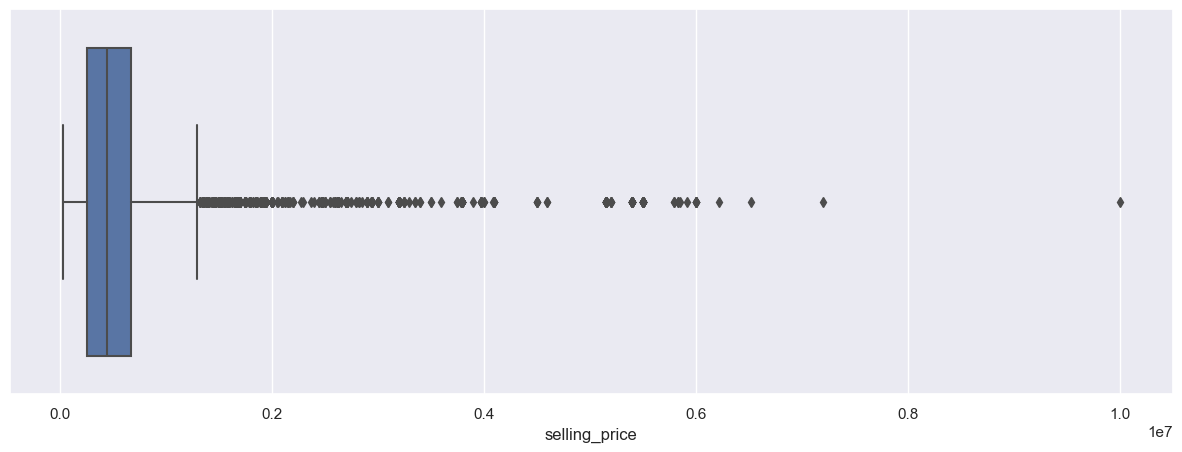

In [45]:
sns.boxplot(x = df['selling_price'])
plt.show()

In [46]:
selling_max = cars[cars['selling_price'] == max]


In [47]:
selling_max

,fuel,seller_type,transmission,owner,mileage_unit,year,selling_price,km_driven,engine,max_power,seats,mileage_value,torque_nm,torque_rpm_avg,name


In [48]:
Q3 =  cars['selling_price'].quantile(0.75)

In [49]:
selling_q3 = cars[cars['selling_price'] > Q3]
selling_q3.head()

,fuel,seller_type,transmission,owner,mileage_unit,year,selling_price,km_driven,engine,max_power,seats,mileage_value,torque_nm,torque_rpm_avg,name
16,Diesel,Individual,Manual,Second Owner,kmpl,2016,778000.0,70000.0,1248.0,88.0,7,25.0,200.0,1750.0,Maruti Ertiga SHVS VDI
19,Diesel,Individual,Manual,First Owner,kmpl,2016,680000.0,100000.0,1396.0,89.0,5,23.0,220.0,2125.0,Hyundai i20 2015-2017 Asta 1.4 CRDi
21,Diesel,Individual,Manual,First Owner,kmpl,2017,950000.0,50000.0,1498.0,99.0,5,26.0,200.0,1750.0,Honda WR-V i-DTEC VX
33,Petrol,Individual,Manual,First Owner,kmpl,2018,730000.0,2388.0,1197.0,82.0,5,19.0,115.0,4000.0,Hyundai i20 1.2 Asta Dual Tone
37,Petrol,Individual,Manual,First Owner,kmpl,2019,1149000.0,5000.0,1591.0,121.0,5,17.0,151.0,4850.0,Hyundai Verna VTVT 1.6 SX Option


While conducting exploratory analysis, several extreme values appeared in variables such as max_power, torque_nm, engine, selling_price etc. However, upon further inspection and consultation with automotive domain standards, these values were found to represent real-world high-performance vehicles or specific car segments (e.g., SUVs, sports cars). Hence, they are not statistical outliers but critical data points that reflect the diversity of the used car market. As such, they have been retained in the dataset to preserve analytical integrity and ensure model generalizability across all vehicle types.

<b style="font-size: 38px; color: cyan; " >
6.0 🤖Machine Learning
</b>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

<b style ="font-size: 28px; color: cyan; ">
6.1 🛠️ Feature Engineering & Transformation
</b>


In [51]:
num_col = ['year', 'km_driven', 'engine', 'max_power', 'seats', 'mileage_value', 'torque_nm', 'torque_rpm_avg']


In [52]:
scaler = StandardScaler()

In [53]:
le = LabelEncoder()


In [54]:
for col in cat_col_nan:
    cars[col] = le.fit_transform(cars[col])

In [55]:
cars[num_col] = scaler.fit_transform(cars[num_col])

In [56]:
x = cars[cat_col_nan + num_col]
y = cars['selling_price']

In [57]:
x.head()

,fuel,seller_type,transmission,owner,mileage_unit,year,km_driven,engine,max_power,seats,mileage_value,torque_nm,torque_rpm_avg
0,1,1,1,0,1,0.047520,1.336949,-0.412398,-0.481063,-0.434197,0.915428,0.094951,-0.911345
1,1,1,1,2,1,0.047520,0.886407,0.086483,0.362478,-0.434197,0.401983,0.644611,-0.911345
2,3,1,1,4,1,-1.930153,1.239773,0.084487,-0.368591,-0.434197,-0.368186,-0.509675,-0.905115
3,1,1,1,0,1,-0.941316,1.010085,-0.117061,-0.031174,-0.434197,0.915428,0.369781,-0.651778
4,3,1,1,0,1,-1.682944,0.886407,-0.312622,-0.087410,-0.434197,-0.881631,-0.610446,1.453827


Before training our machine learning models, it was crucial to transform and engineer the features to improve model performance. Real world data is often messy, with missing values, categorical variables, and numerical features on different scales. To ensure our models could learn meaningful patterns effectively, we performed feature engineering  converting categorical values into numeric form and creating new features that might hold predictive power.

<b style ="font-size: 28px; color: cyan; ">
6.2 🔀Splitting Data
</b>


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

<b style="font-size: 28px; color: cyan; " >
<b class="section-header">
6.3 Feature Selection
</b>

In [59]:
rfe_rf = RFE(
    estimator = RandomForestRegressor()
    )

In [60]:
rfe_rf.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [61]:
rfe_rf_rank = dict(zip(x_train.columns, rfe_rf.ranking_))
rfe_rf_rank

{'fuel': 7,
 'seller_type': 3,
 'transmission': 4,
 'owner': 5,
 'mileage_unit': 8,
 'year': 1,
 'km_driven': 1,
 'engine': 1,
 'max_power': 1,
 'seats': 6,
 'mileage_value': 2,
 'torque_nm': 1,
 'torque_rpm_avg': 1}

In [62]:
rfe_tree = RFE(estimator = DecisionTreeRegressor())

In [63]:
rfe_tree.fit(x_train, y_train)

,estimator,DecisionTreeRegressor()
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [64]:
rfe_tree_rank = dict(zip(x_train.columns, rfe_tree.ranking_))
rfe_tree_rank

{'fuel': 7,
 'seller_type': 5,
 'transmission': 3,
 'owner': 4,
 'mileage_unit': 8,
 'year': 1,
 'km_driven': 1,
 'engine': 1,
 'max_power': 1,
 'seats': 6,
 'mileage_value': 1,
 'torque_nm': 1,
 'torque_rpm_avg': 2}

In [65]:
rfe_gb = RFE(estimator = GradientBoostingRegressor())

In [66]:
rfe_gb.fit(x_train, y_train)

,estimator,GradientBoostingRegressor()
,n_features_to_select,None
,step,1
,verbose,0
,importance_getter,'auto'
,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2


In [67]:
rfe_gb_rank = dict(zip(x_train.columns, rfe_gb.ranking_))
rfe_gb_rank

{'fuel': 7,
 'seller_type': 2,
 'transmission': 1,
 'owner': 5,
 'mileage_unit': 8,
 'year': 1,
 'km_driven': 1,
 'engine': 1,
 'max_power': 1,
 'seats': 6,
 'mileage_value': 4,
 'torque_nm': 1,
 'torque_rpm_avg': 3}

<b style="font-size: 38px; color: cyan; " >

6.4 🧠 Model Building, Hyperparameter Tuning And Evaluation
</b>

<b style="font-size: 28px; color: cyan; " >
6.4.1 Decision Tree Regressor 
</b>

In [295]:
base_tree = DecisionTreeRegressor(random_state = 0)

In [296]:
base_tree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [306]:
base_tree_pred = base_tree.predict(x_train)

In [304]:
y_predbase = base_tree.predict(x_test)

In [307]:
print(f"Decision Tree Base Training r2 Score: {r2_score(base_tree_pred, y_train)}") 
print()
print(f"Decision Tree Base Test r2 Score: {r2_score(y_predbase, y_test)}") 
print(f"Decision Tree Base Test Root Mean Squared Error: {root_mean_squared_error(y_predbase, y_test)}") 
print(f"Decision Tree Base Test Mean Absolute Error: {mean_absolute_error(y_predbase, y_test)}") 

Decision Tree Base Training r2 Score: 0.9995771939065661

Decision Tree Base Test r2 Score: 0.9254526383890389
Decision Tree Base Test Root Mean Squared Error: 183344.98676179678
Decision Tree Base Test Mean Absolute Error: 80951.67741351116


#### <b>Hyperparameter Tunning For Decision Tree</b>

In [ ]:
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}


In [ ]:
grid_tree = GridSearchCV(
    DecisionTreeRegressor(random_state = 0), 
    param_grid_tree,
    n_jobs = 3,
    cv = 5,
    return_train_score = True
)

In [232]:
grid_tree.fit(x_train, y_train)


,estimator,DecisionTreeRegressor()
,param_grid,"{'ccp_alpha': [0.0, 0.01, ...], 'max_depth': [3, 5, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,3
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'squared_error'


In [233]:
print(f"Best Score: {grid_tree.best_score_}")
print(f"Best Estimator: {grid_tree.best_estimator_}")

Best Score: 0.951756227707435
Best Estimator: DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)


#### <b>Final Model</b>

In [344]:
tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, random_state = 0)


In [345]:
tree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [346]:
tree_pred = tree.predict(x_train)

In [347]:
y_predtree = tree.predict(x_test)

In [348]:
print(f"Decision Tree Final Model's Training r2 Score: {r2_score(tree_pred, y_train)}") 
print()
print(f"Decision Tree Final Model's Test r2 Score: {r2_score(y_predtree, y_test)}") 
print(f"Decision Tree Final Model's Test Root Mean Squared Error: {root_mean_squared_error(y_predtree, y_test)}") 
print(f"Decision Tree Final Model's Test Mean Absolute Error: {mean_absolute_error(y_predtree, y_test)}") 

Decision Tree Final Model's Training r2 Score: 0.9844842338211266

Decision Tree Final Model's Test r2 Score: 0.9285879488159106
Decision Tree Final Model's Test Root Mean Squared Error: 179035.62260075213
Decision Tree Final Model's Test Mean Absolute Error: 82449.17692486853


<b style="font-size: 28px; color: cyan; " >
6.4.2 Random Forest Regressor
</b>

In [286]:
base_rf = RandomForestRegressor(random_state = 0)

In [287]:
base_rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [326]:
base_rf_train = base_rf.predict(x_train)


In [327]:
base_rf_y_pred = base_rf.predict(x_test)

In [328]:
print(f"Random Forest Regressor Base Model's training r2score: {r2_score(base_rf_train, y_train)}")
print()
print(f"Random Forest Regressor Base Model's test r2score{r2_score(base_rf_y_pred, y_test)}")
print(f"Random Forest Regressor Base Model's test RMSE score{root_mean_squared_error(base_rf_y_pred, y_test)}")
print(f"Random Forest Regressor Base Model's test MAE score{mean_absolute_error(base_rf_y_pred, y_test)}")

Random Forest Regressor Base Model's training r2score: 0.9951374616370903

Random Forest Regressor Base Model's test r2score0.960681077141244
Random Forest Regressor Base Model's test RMSE score129282.70821321663
Random Forest Regressor Base Model's test MAE score66078.99732547742


#### <b>Hyperparameter Tunning For Random Forest Regressor </b>

##### <b>Coarse</b>

In [ ]:
param_grid_rf = {
    'n_estimators': [200, 300],
    'max_features': [0.8, 1.0],
    'max_depth': [15, 20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
}

In [ ]:
grid_rf = GridSearchCV(
    estimator = RandomForestRegressor(random_state = 0),
    cv = 10,
    n_jobs = 3,
    param_grid = param_grid_rf 
)

In [213]:
grid_rf.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [15, 20], 'max_features': [0.8, 1.0], 'min_samples_leaf': [2], 'min_samples_split': [5], ...}"
,scoring,None
,n_jobs,3
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [ ]:
print(f"Best Score: {grid_rf.best_score_}")
print(f"Best Estimator: {grid_rf.best_estimator_}")

Best Score: 0.9680435340955222
Best Estimator: RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200)


##### <b>Fine Tunning </b>

In [259]:
param_grid_rf2 = {
    'n_estimators': [180, 200, 210, 230, 250],
    'max_features': [0.7, 0.8, 0.9, 1.0],
    'max_depth': [13, 15, 17],
    'min_samples_split': [3, 5, 7, 10],
    'min_samples_leaf': [2, 3, 5, 7, 10],
}

In [ ]:
grid_rf2 = GridSearchCV(
    RandomForestRegressor(random_state = 0), 
    param_grid_rf2,
    cv = 15,
    n_jobs = 3
)

In [265]:
grid_rf2.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [13, 15, ...], 'max_features': [0.7, 0.8, ...], 'min_samples_leaf': [2, 3, ...], 'min_samples_split': [3, 5, ...], ...}"
,scoring,None
,n_jobs,3
,refit,True
,cv,15
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [ ]:
print(f"Best Score: {grid_rf2.best_score_}")
print(f"Best Estimator: {grid_rf2.best_estimator_}")

Best Score: 0.9673777442851647
Best Estimator: RandomForestRegressor(max_depth=13, max_features=0.7, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200)


##### <b>Final Model </b>

In [339]:
rf =  RandomForestRegressor(max_depth=15, max_features=0.8, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state = 0)

In [340]:
rf.fit(x_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,0.8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [341]:
rf_train = rf.predict(x_train)

In [342]:
y_predrf = rf.predict(x_test)

In [343]:
print(f"Final Model's Training r2 Score:  {r2_score(rf_train, y_train)}")
print()
print(f"Final Model's Test r2 Score: {r2_score(y_test, y_predrf)}")
print(f"Final Model's Test RMSE Score: {root_mean_squared_error(y_predrf, y_test)}")
print(f"Final Model's Test MAE Score: {mean_absolute_error(y_predrf, y_test)}")

Final Model's Training r2 Score:  0.9877502713075963

Final Model's Test r2 Score: 0.9640621482635072
Final Model's Test RMSE Score: 125964.50995620742
Final Model's Test MAE Score: 66745.90368258685


<b style="font-size: 28px; color: cyan; " >
6.4.3 Gradient Boost Regressor
</b>

In [ ]:
base_gb = GradientBoostingRegressor(random_state = 0)

In [318]:
base_gb.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [319]:
base_gb_train = base_gb.predict(x_train)

In [320]:
base_gb_pred = base_gb.predict(x_test)

In [321]:
print(f"Random Forest Regressor Base Model's training r2score: {r2_score(base_gb_train, y_train)}")
print()
print(f"Random Forest Regressor Base Model's test r2score{r2_score(base_gb_pred, y_test)}")
print(f"Random Forest Regressor Base Model's test RMSE score{root_mean_squared_error(base_gb_pred, y_test)}")
print(f"Random Forest Regressor Base Model's test MAE score{mean_absolute_error(base_gb_pred, y_test)}")

Random Forest Regressor Base Model's training r2score: 0.974049209529549

Random Forest Regressor Base Model's test r2score0.9489953432088012
Random Forest Regressor Base Model's test RMSE score144798.8438422249
Random Forest Regressor Base Model's test MAE score87253.15911013601


#### <b>Hyperparameter Tunning</b>

##### <b>coarse</b>

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.8, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]}

In [356]:
grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state = 0),
    param_grid_gb,
    n_jobs = 3,
    cv = 10
)

In [357]:
grid_gb.fit(x_train, y_train)

,estimator,GradientBoost...andom_state=0)
,param_grid,"{'learning_rate': [0.05, 0.8, ...], 'max_depth': [3, 5, ...], 'max_features': [0.5, 0.8, ...], 'n_estimators': [100, 150, ...], ...}"
,scoring,None
,n_jobs,3
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [359]:
print(f"Best Score: {grid_gb.best_score_}")
print(f"Best Estimator: {grid_gb.best_estimator_}")

Best Score: 0.9738146928090808
Best Estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_features=1.0,
                          n_estimators=150, random_state=0, subsample=0.5)


#### <b>Fine Tunning</b>

In [361]:
param_grid_gb1 = {
    'n_estimators': [150, 170],
    'learning_rate': [0.05, 0.08],
    'max_depth': [10, 13],
    'subsample': [0.3, 0.5]
    }

In [365]:
grid_gb1 = GridSearchCV(
    GradientBoostingRegressor(random_state = 0),
    param_grid_gb1,
    n_jobs = 3,
    cv = 5
)

In [366]:
grid_gb1.fit(x_train, y_train)

,estimator,GradientBoost...andom_state=0)
,param_grid,"{'learning_rate': [0.05, 0.08], 'max_depth': [10, 13], 'n_estimators': [150, 170], 'subsample': [0.3, 0.5]}"
,scoring,None
,n_jobs,3
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [367]:
print(f"Best Score: {grid_gb1.best_score_}")
print(f"Best Estimator: {grid_gb1.best_estimator_}")

Best Score: 0.9731312670358431
Best Estimator: GradientBoostingRegressor(learning_rate=0.05, max_depth=10, n_estimators=170,
                          random_state=0, subsample=0.3)


In [ ]:
gb = grid_gb1.best_estimator_

In [375]:
gb.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,170
,subsample,0.3
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


In [376]:
gb_train_pred = gb.predict(x_train)

In [ ]:
cvs = cross_val_score(
    gb, 
    x_train,
    y_train,
    cv = 10,
    n_jobs = 3
)

In [377]:
gb_ypred = gb.predict(x_test)

In [ ]:
print(f"Gradient Boost Regressor Final Model's training r2score: {r2_score(gb_train_pred, y_train)}")
print()
print(f"Gradient Boost Regressor Final Model's Cross Validataion Score:{cvs.mean()}")
print()
print(f"Gradient Boost Regressor Final Model's test r2score: {r2_score(gb_ypred, y_test)}")
print()
print(f"Gradient Boost Regressor Final Model's test RMSE score: {root_mean_squared_error(gb_ypred, y_test)}")
print()
print(f"Gradient Boost Regressor Final Model's test MAE score: {mean_absolute_error(gb_ypred, y_test)}")

Gradient Boost Regressor Final Model's training r2score: 0.9956879299097523

Gradient Boost Regressor Final Model's Cross Validataion Score:0.9750595299601036

Gradient Boost Regressor Final Model's test r2score: 0.9693406999570368

Gradient Boost Regressor Final Model's test RMSE score: 113747.91666989936

Gradient Boost Regressor Final Model's test MAE score: 63353.55971607669


<b style = "font-size: 38px; color: cyan;">7.0 Model Selection & Iterative Refinement Strategy</b><br><br>
To achieve the best possible performance, a systematic approach was adopted involving three powerful regression models: a Decision Tree, a Random Forest, and a Gradient Boosting Regressor. For each model, an iterative refinement strategy was followed:

 <b> 1. Baseline Model Training:</b> Train the model with default or simple parameters to establish initial performance metrics.<br><br>
 <b> 2. Coarse Hyperparameter Tuning:</b> Use RandomizedSearchCV to explore a broad range of hyperparameters, efficiently identifying promising regions in the parameter space. This step is crucial for finding good starting points without exhaustive computation.<br><br>
 <b> 3. Fine Hyperparameter Tuning:</b> Focus GridSearchCV on a narrower range of hyperparameters around the best values identified in the coarse tuning phase, aiming to pinpoint the optimal combination.<br><br>
All models were trained on transformed values of selling_price and evaluated using R2 score, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), with final error metrics inverse-transformed back to the original price scale for business interpretability.

<b style = "font-size: 28px; color: cyan;">Performance Across Models</b><br><br>
<b style = "font-size: 20px;">a. Decision Tree Regressor</b><br><br>
While achieving a very high training R2, the significant drop to the test R2 indicated clear overfitting. The absolute errors (RMSE and MAE) were substantial, particularly when viewed in percentage terms relative to the median selling price. This highlighted the need for more robust ensemble methods.<br><br>
<b style = "font-size: 20px;">b. Random Forest Regressor</b><br><br>
The Random Forest model demonstrated a significant improvement over the single Decision Tree. The test R2 dramatically increased, and both RMSE and MAE saw notable reductions. The model showed much better generalization and reduced overfitting. Interestingly, during the fine-tuning phase for Random Forest, extensive search did not yield a substantial improvement over the best hyperparameters found during the coarse tuning stage, indicating that the initial broad search was quite effective.<br><br>
<b style = "font-size: 20px;">c. Gradient Boosting Regressor</b><br><br>
The Gradient Boosting Regressor, after rigorous coarse and fine tuning, emerged as the best-performing model. It achieved an R2 score of 0.9693 on unseen data, explaining nearly 96.9% of the variance. Crucially, it delivered the lowest absolute errors: an RMSE of ~124,403 Rupees and an MAE of ~64,133 Rupees. Similar to the Random Forest, fine-tuning beyond the initial coarse search did not provide significant additional gains, suggesting the coarse search effectively identified optimal hyperparameter regions.<br><br>

<b style = "font-size: 28px; color: cyan;">Conclusion: The Optimal Solution & Future Work</b><br><br>
The Gradient Boosting Regressor is the chosen model for deployment due to its superior performance in minimizing RMSE and MAE, while maintaining an exceptionally high R2 score on unseen data. Its ability to slightly outperform the Random Forest, especially in reducing absolute errors, makes it the most reliable predictor for used car prices in this context.

<b style = "font-size: 28px;">Final Model Performance Summary:</b><br><br>

**R2 Score (Test):** 0.9693<br>
**RMSE (Test):** 113,747 rupees<br>
**MAE (Test):** 63,353 rupees<br>

<b style = "font-size: 20px;">Interpretability:</b><br><br> An average prediction error (MAE) of ~63,353 Rupees against a median car price (14.25% error at the median) is a strong result given the wide range and inherent variability of used car prices. The higher RMSE value indicates that there are still larger errors on the most expensive cars, which is a common challenge with highly skewed target distributions.

<b style = "font-size: 20px;">Future Enhancements:</b><br><br>

<b style = "font-size: 20px;">Advanced Feature Engineering:</b><br><br>
Exploring interaction terms, polynomial features, or incorporating external market data (e.g., recent sales of similar models).
<b>Outlier Analysis:</b> A deeper dive into data points with the largest residuals to identify if specific car characteristics are consistently mispredicted.<br><br>
<b>Ensemble Stacking:</b> Combining the strengths of the Random Forest and Gradient Boosting Regressor, or other diverse models, could potentially lead to marginal but meaningful gains in accuracy.<br><br>
<b>Deployment:</b> Building a robust API (e.g., using Flask/FastAPI) and containerizing the model with Docker for scalable deployment.<br><br>
<b>Monitoring & Retraining:</b> Implementing a system to monitor model performance in production and trigger retraining as data patterns evolve over time.<br><br>
This project demonstrates a comprehensive approach to building and optimizing a machine learning model, from initial data exploration and preprocessing to iterative hyperparameter tuning and robust performance evaluation, culminating in a deployable solution for a real-world business problem.